# Calculo de la Media

In [35]:
import pandas as pd
import numpy as np
url = 'Casos covid por provincias.xlsx'
df=pd.read_excel(url)
fecha_inicio="16/3/2020"
provincia= df[df['Provincia'] == "El Oro"]  
infectados=provincia.iloc[0].loc[fecha_inicio:]
tasa=np.mean(infectados)
print("Media de la provincia del Oro",tasa)
print("TASA * 3 ",tasa*3)

Media de la provincia del Oro 90.97368421052632
TASA * 3  272.92105263157896


# Librerias

In [7]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

# Parametros

In [58]:
#PARAMETROS
HOSPITALES = 2
HOSPITAL_A_NUM_CAMAS = 158
HOSPITAL_B_NUM_CAMAS = 220
HOSPITAL_A_NUM_PERSONAL = 280
HOSPITAL_B_NUM_PERSONAL = 345
HOSPITAL_A_EQUIPOS = 26
HOSPITAL_B_EQUIPOS = 58

INFECTADOS = 100

TASA_CRECIMIENTO = 272


DIAS_PERSONAL = 10
DIAS_EQUIPOS = 3
DIAS_INTERNADO = 10
DIAS_SIMULACION = 100
#Coto de atencion por persona
COSTO_POR_PERSONA=800


#Diccionario para almacenar los resultados
persona_recuperadas={}
persona_fallecidas={}

pacientes_ninos={}
pacientes_adultos={}
pacientes_ancianos={}

pacientes_femeninos={}
pacientes_masculinos={}

pacientes_femeninos_con_sintomas={}
pacientes_femeninos_con_neumonia={}
pacientes_femeninos_cuidado_intensivo={}
pacientes_femeninos_fallecidos={}
pacientes_femeninos_recuperados={}

pacientes_masculinos_con_sintomas={}
pacientes_masculinos_con_neumonia={}
pacientes_masculinos_cuidado_intensivo={}
pacientes_masculinos_fallecidos={}
pacientes_masculinos_recuperados={}

p_ninos_con_sintomas={}
p_ninos_con_neumonia={}
p_ninos_con_sintomas={}
p_ninos_cuidado_intensivos={}
p_ninos_fallecidos={}
p_ninos_recuperados={}

p_adultos_con_sintomas={}
p_adultos_con_neumonia={}
p_adultos_con_sintomas={}
p_adultos_cuidado_intensivos={}
p_adultos_fallecidos={}
p_adultos_recuperados={}

p_ancianos_con_sintomas={}
p_ancianos_con_neumonia={}
p_ancianos_con_sintomas={}
p_ancianos_cuidado_intensivos={}
p_ancianos_fallecidos={}
p_ancianos_recuperados={}

pacientes_con_equipos=[]
pacientes_con_camas=[]
pacientes_con_personalmedico=[]

In [87]:
class Hospital(object):
    #constructor
    def __init__(self, env, num_cama,num_personal,num_equipos, name):
            self.env = env
            self.num_cama = num_cama
            self.num_personal=num_personal
            self.num_equipos=num_equipos
            self.camas = simpy.Resource(env, num_cama)
            self.personal = simpy.Resource(env, num_personal)
            self.equipos = simpy.Resource(env, num_equipos)
            self.name = name

    def ingresar_paciente(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-5, DIAS_INTERNADO+5))
        print("Ingreso paciente: ", paciente, " en: ", self.env.now, " hospital debido a dintomas Leves", self.name)
    def personal_paciente(self, paciente):
        yield self.env.timeout(random.randint(DIAS_PERSONAL-3, DIAS_PERSONAL+3))
        print("Personal al asignado al pacinte: ", paciente, " en: ", self.env.now, " hospital debido a Neumonia", self.name)
    def equipos_paciente(self, paciente):
        yield self.env.timeout(random.randint(DIAS_EQUIPOS-1, DIAS_EQUIPOS+1))
        print("Equipo para el paciente: ", paciente, " en: ", self.env.now, " el hospital debido a Cuidados Intensivos", self.name)
        
def llegada_paciente(env, hospital, paciente):
    arrive = env.now
    edad = random.randint(1,100)
    if (edad <= 28 and edad > 0):
        pacientes_ninos[env.now] = pacientes_ninos[env.now] + 1 if env.now in pacientes_ninos else  1
        genero=random.randint(1,100)
        if (genero <= 46):
        #MASCULINOS-----------NIÑOS
            pacientes_masculinos[env.now] = pacientes_masculinos[env.now] + 1 if env.now in pacientes_masculinos else  1
            sintomas=random.randint(1,100)
            #SINTOMAS---------------------------
            if (sintomas <= 5):
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(1,3) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimiento = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimiento:
                            print("Paciente: ", paciente, "entro a cama en el hospital " , hospital.name)
                            yield env.process(hospital.ingresar_paciente(paciente))
                            arrive2 = env.now
                            pacientes_con_camas.append(1)
                            pacientes_masculinos_con_sintomas[env.now]=pacientes_masculinos_con_sintomas[env.now]+1 if env.now in pacientes_masculinos_con_sintomas else 1
                            p_ninos_con_sintomas[env.now]=p_ninos_con_sintomas[env.now]+1 if env.now in p_ninos_con_sintomas else 1
                            #pacientes_masculinos_con_sintomas.append(1)
                            #p_ninos_con_sintomas.append()
                            #NEUMONIA---------------------------
                            neumonia=random.randint(1,100)
                            if (neumonia <= 75):
                                with hospital.personal.request() as persona:
                                    dias_esperando_personal = random.randint(1,2)
                                    requerimiento2 = yield persona | env.timeout(dias_esperando_personal)
                                    wait2 = env.now - arrive2
                                    if persona in requerimiento2:
                                        print("Paciente: ", paciente, "tuvo personal medico en el hospital" , hospital.name)
                                        yield env.process(hospital.personal_paciente(paciente))
                                        arrive3 = env.now
                                        pacientes_con_personalmedico.append(1)
                                        pacientes_masculinos_con_neumonia[env.now]=pacientes_masculinos_con_neumonia[env.now]+1 if env.now in pacientes_masculinos_con_neumonia else 1
                                        
                                        p_ninos_con_neumonia[env.now]=p_ninos_con_neumonia[env.now]+1 if env.now in p_ninos_con_neumonia else 1
                                        p_ninos_con_neumonia[env.now]=p_ninos_con_neumonia[env.now]+1 if env.now in p_ninos_con_neumonia else 1
                                        
                                        #pacientes_masculinos_con_neumonia.append(1)
                                        #p_ninos_con_neumonia.append(1)
                                        #Intensivos---------------------------
                                        intensivos=random.randint(1,100)
                                        if (intensivos <= 25):
                                            with hospital.equipos.request() as equipo:
                                                dias_esperando_equipo = random.randint(1,2)
                                                requerimiento3 = yield equipo | env.timeout(dias_esperando_equipo)
                                                wait3 = env.now - arrive3
                                                if equipo in requerimiento3:
                                                    print("Paciente: ", paciente, "uso equipos medicos del hospital " , hospital.name)
                                                    yield env.process(hospital.equipos_paciente(paciente))
                                                    estado = random.randint(1,100)
                                                    pacientes_con_equipos.append(1)
                                                    pacientes_masculinos_cuidado_intensivo[env.now]=pacientes_masculinos_cuidado_intensivo[env.now]+1 if env.now in pacientes_masculinos_cuidado_intensivo else 1
                                                    p_ninos_cuidado_intensivos[env.now]=p_ninos_cuidado_intensivos[env.now]+1 if env.now in p_ninos_cuidado_intensivos else 1
                                                    #pacientes_masculinos_cuidado_intensivo.append(1)
                                                    #p_ninos_cuidados_intensivos.append(1)
                                                    if (estado < 8) :
                                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                        pacientes_masculinos_fallecidos[env.now] = pacientes_masculinos_fallecidos[env.now] + 1 if env.now in pacientes_masculinos_fallecidos else  1
                                                        p_ninos_fallecidos[env.now] = p_ninos_fallecidos[env.now] + 1 if env.now in p_ninos_fallecidos else  1
                                                    else:
                                                        persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                                                        pacientes_masculinos_recuperados[env.now]= pacientes_masculinos_recuperados[env.now]+1 if env.now in  pacientes_masculinos_recuperados else 1
                                                        p_ninos_recuperados[env.now]=p_ninos_recuperados[env.now]+1 if env.now in p_ninos_recuperados else 1
                                                else:
                                                    print("Paciente " , paciente, "del hospital ", hospital.name, " espero", wait3 , " dias ---> Fallesio Por Falta de Equipos")
                                                    persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                    pacientes_masculinos_fallecidos[env.now] = pacientes_masculinos_fallecidos[env.now] + 1 if env.now in pacientes_masculinos_fallecidos else  1
                                                    p_ninos_fallecidos[env.now] = p_ninos_fallecidos[env.now] + 1 if env.now in p_ninos_fallecidos else  1
                                        else:
                                            print("Paciente: ", paciente, "del hospital " , hospital.name, "SALIO DE Cuidados Intensivos")
                                            persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                                            pacientes_masculinos_recuperados[env.now]= pacientes_masculinos_recuperados[env.now]+1 if env.now in  pacientes_masculinos_recuperados else 1
                                            p_ninos_recuperados[env.now]=p_ninos_recuperados[env.now]+1 if env.now in p_ninos_recuperados else 1
                                    else:
                                        print("Paciente " , paciente, " del hospital ", hospital.name, " espero ", wait2 , " dias ---> Fallecio por Falta de Personal")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        pacientes_masculinos_recuperados[env.now]= pacientes_masculinos_recuperados[env.now]+1 if env.now in  pacientes_masculinos_recuperados else 1
                                        p_ninos_recuperados[env.now]=p_ninos_recuperados[env.now]+1 if env.now in p_ninos_recuperados else 1  
                            else:
                                print("Paciente: ", paciente, "del hospital " , hospital.name, "SE CURO de Neumonia")
                                persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                                pacientes_masculinos_recuperados[env.now]= pacientes_masculinos_recuperados[env.now]+1 if env.now in  pacientes_masculinos_recuperados else 1
                                p_ninos_recuperados[env.now]=p_ninos_recuperados[env.now]+1 if env.now in p_ninos_recuperados else 1
             
                    else:
                        print("Paciente " , paciente, "del hospital ", hospital.name, " espero ", wait , " dias ---> Fallecio por Falta de Camas")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                        pacientes_masculinos_fallecidos[env.now] = pacientes_masculinos_fallecidos[env.now] + 1 if env.now in pacientes_masculinos_fallecidos else  1
                        p_ninos_fallecidos[env.now] = p_ninos_fallecidos[env.now] + 1 if env.now in p_ninos_fallecidos else 1
            else: 
                print("Paciente: ", paciente, "del hospital " , hospital.name, "SIN Sintomas")
                persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                pacientes_masculinos_recuperados[env.now]= pacientes_masculinos_recuperados[env.now]+1 if env.now in  pacientes_masculinos_recuperados else 1
                p_ninos_recuperados[env.now]=p_ninos_recuperados[env.now]+1 if env.now in p_ninos_recuperados else 1
        else:
            #FEMENINOS ----- NIÑAS
            pacientes_femeninos[env.now] = pacientes_femeninos[env.now] + 1 if env.now in pacientes_femeninos else  1
            sintomas=random.randint(1,100)
                #SINTOMAS---------------------------
            if (sintomas <= 5):
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(1,3) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimiento = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimiento:
                            print("Paciente: ", paciente, "entro a cama en el hospital " , hospital.name)
                            yield env.process(hospital.ingresar_paciente(paciente))
                            arrive2 = env.now
                            pacientes_con_camas.append(1)
                            pacientes_femeninos_con_sintomas[env.now]=pacientes_femeninos_con_sintomas[env.now]+1 if env.now in pacientes_femeninos_con_sintomas else 1
                            p_ninos_con_sintomas[env.now]=p_ninos_con_sintomas[env.now]+1 if env.now in p_ninos_con_sintomas else 1
                            #pacientes_femeninos_con_sintomas.append(1)
                            #p_ninos_con_sintomas.append()
                            #NEUMONIA---------------------------
                            neumonia=random.randint(1,100)
                            if (neumonia <= 75):
                                with hospital.personal.request() as persona:
                                    dias_esperando_personal = random.randint(1,2)
                                    requerimiento2 = yield persona | env.timeout(dias_esperando_personal)
                                    wait2 = env.now - arrive2
                                    if persona in requerimiento2:
                                        print("Paciente: ", paciente, "tuvo personal medico en el hospital" , hospital.name)
                                        yield env.process(hospital.personal_paciente(paciente))
                                        arrive3 = env.now
                                        pacientes_con_personalmedico.append(1)
                                        pacientes_femeninos_con_neumonia[env.now]=pacientes_femeninos_con_neumonia[env.now]+1 if env.now in pacientes_femeninos_con_neumonia else 1
                                        p_ninos_con_neumonia[env.now]=p_ninos_con_neumonia[env.now]+1 if env.now in p_ninos_con_neumonia else 1
                                        #pacientes_femeninos_con_neumonia.append(1)
                                        #p_ninos_con_neumonia.append(1)
                                        #Intensivos---------------------------
                                        intensivos=random.randint(1,100)
                                        if (intensivos <= 25):
                                            with hospital.equipos.request() as equipo:
                                                dias_esperando_equipo = random.randint(1,2)
                                                requerimiento3 = yield equipo | env.timeout(dias_esperando_equipo)
                                                wait3 = env.now - arrive3
                                                if equipo in requerimiento3:
                                                    print("Paciente: ", paciente, "uso equipos medicos del hospital " , hospital.name)
                                                    yield env.process(hospital.equipos_paciente(paciente))
                                                    estado = random.randint(1,100)
                                                    pacientes_con_equipos.append(1)
                                                    pacientes_femeninos_cuidado_intensivo[env.now]=pacientes_femeninos_cuidado_intensivo[env.now]+1 if env.now in pacientes_femeninos_cuidado_intensivo else 1
                                                    p_ninos_cuidado_intensivos[env.now]=p_ninos_cuidado_intensivos[env.now]+1 if env.now in p_ninos_cuidado_intensivos else 1
                                                    #pacientes_femeninos_cuidado_intensivo.append(1)
                                                    #p_ninos_cuidados_intensivos.append(1)
                                                    if (estado < 8) :
                                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                        pacientes_femeninos_fallecidos[env.now] = pacientes_femeninos_fallecidos[env.now] + 1 if env.now in pacientes_femeninos_fallecidos else  1
                                                        p_ninos_fallecidos[env.now] = p_ninos_fallecidos[env.now] + 1 if env.now in p_ninos_fallecidos else  1
                                                    else:
                                                        persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                                                        pacientes_femeninos_recuperados[env.now]= pacientes_femeninos_recuperados[env.now]+1 if env.now in  pacientes_femeninos_recuperados else 1
                                                        p_ninos_recuperados[env.now]=p_ninos_recuperados[env.now]+1 if env.now in p_ninos_recuperados else 1
                                                else:
                                                    print("Paciente " , paciente, "del hospital ", hospital.name, " espero", wait3 , " dias ---> Fallesio Por Falta de Equipos")
                                                    persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                    pacientes_femeninos_fallecidos[env.now] = pacientes_femeninos_fallecidos[env.now] + 1 if env.now in pacientes_femeninos_fallecidos else  1
                                                    p_ninos_fallecidos[env.now] = p_ninos_fallecidos[env.now] + 1 if env.now in p_ninos_fallecidos else  1
                                        else:
                                            print("Paciente: ", paciente, "del hospital " , hospital.name, "SALIO DE Cuidados Intensivos")
                                            persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                                            pacientes_femeninos_recuperados[env.now]= pacientes_femeninos_recuperados[env.now]+1 if env.now in  pacientes_femeninos_recuperados else 1
                                            p_ninos_recuperados[env.now]=p_ninos_recuperados[env.now]+1 if env.now in p_ninos_recuperados else 1
                                    else:
                                        print("Paciente " , paciente, " del hospital ", hospital.name, " espero ", wait2 , " dias ---> Fallecio por Falta de Personal")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        pacientes_femeninos_recuperados[env.now]= pacientes_femeninos_recuperados[env.now]+1 if env.now in  pacientes_femeninos_recuperados else 1
                                        p_ninos_recuperados[env.now]=p_ninos_recuperados[env.now]+1 if env.now in p_ninos_recuperados else 1  
                            else:
                                print("Paciente: ", paciente, "del hospital " , hospital.name, "SE CURO de Neumonia")
                                persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                                pacientes_femeninos_recuperados[env.now]= pacientes_femeninos_recuperados[env.now]+1 if env.now in  pacientes_femeninos_recuperados else 1
                                p_ninos_recuperados[env.now]=p_ninos_recuperados[env.now]+1 if env.now in p_ninos_recuperados else 1
             
                    else:
                        print("Paciente " , paciente, "del hospital ", hospital.name, " espero ", wait , " dias ---> Fallecio por Falta de Camas")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                        pacientes_femeninos_fallecidos[env.now] = pacientes_femeninos_fallecidos[env.now] + 1 if env.now in pacientes_femeninos_fallecidos else  1
                        p_ninos_fallecidos[env.now] = p_ninos_fallecidos[env.now] + 1 if env.now in p_ninos_fallecidos else 1
            else: 
                print("Paciente: ", paciente, "del hospital " , hospital.name, "SIN Sintomas")
                persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                pacientes_femeninos_recuperados[env.now]= pacientes_femeninos_recuperados[env.now]+1 if env.now in  pacientes_femeninos_recuperados else 1
                p_ninos_recuperados[env.now]=p_ninos_recuperados[env.now]+1 if env.now in p_ninos_recuperados else 1
                
    if (edad <= 64 and edad > 15):
        pacientes_adultos[env.now] = pacientes_adultos[env.now] + 1 if env.now in pacientes_adultos else  1
        p_adultos_con_sintomas[env.now]=p_adultos_con_sintomas[env.now]+1 if env.now in p_adultos_con_sintomas else 1
         #p_adultos_con_sintomas.append(1)
        genero=random.randint(1,100)
        if (genero <= 46):
            #MASCULINOS-----------ADULTO
            pacientes_masculinos[env.now] = pacientes_masculinos[env.now] + 1 if env.now in pacientes_masculinos else  1
            neumonia=random.randint(1,100)
            #NEUMONIA---------------------------
            if (neumonia <= 75):
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(1,3) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimiento = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimiento:
                        print("Paciente: ", paciente, "entro a cama en el hospital " , hospital.name)
                        yield env.process(hospital.ingresar_paciente(paciente))
                        arrive2 = env.now
                        pacientes_con_camas.append(1)
                        pacientes_masculinos_con_neumonia[env.now]=pacientes_masculinos_con_neumonia[env.now]+1 if env.now in pacientes_masculinos_con_neumonia else 1
                        p_adultos_con_neumonia[env.now]=p_adultos_con_neumonia[env.now]+1 if env.now in p_adultos_con_neumonia else 1
                        #pacintes_masculinos_con_neumonia.append(1)
                        #p_adultos_con_neumonia.append(1)
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimiento2 = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimiento2:
                                print("Paciente: ", paciente, "tuvo personal medico en el " , hospital.name)
                                yield env.process(hospital.personal_paciente(paciente))
                                arrive3 = env.now
                                pacientes_con_personalmedico.append(1)
                         #INTENSIVOS---------------------------
                                intensivos=random.randint(1,100)
                                if (intensivos <= 25):
                                    with hospital.equipos.request() as equipo:
                                        dias_esperando_equipo = random.randint(1,2)
                                        requerimiento3 = yield equipo | env.timeout(dias_esperando_equipo)
                                        wait3 = env.now - arrive3
                                        if equipo in requerimiento3:
                                            print("Paciente: ", paciente, "uso equipos medicos del hospital " , hospital.name)
                                            yield env.process(hospital.equipos_paciente(paciente))
                                            estado = random.randint(1,100)
                                            pacientes_con_equipos.append(1)
                                            pacientes_masculinos_cuidado_intensivo[env.now]=pacientes_masculinos_cuidado_intensivo[env.now]+1 if env.now in pacientes_masculinos_cuidado_intensivo else 1
                                            p_adultos_cuidado_intensivos[env.now]=p_adultos_cuidado_intensivos[env.now]+1 if env.now in p_adultos_cuidado_intensivos else 1
                                            ##pacientes_masculinos_cuidado_intensivo.append(1)
                                            #p_adultos_cuidados_intensivos.append(1)
                                            if (estado < 8) :
                                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                pacientes_masculinos_fallecidos[env.now] = pacientes_masculinos_fallecidos[env.now] + 1 if env.now in pacientes_masculinos_fallecidos else  1
                                                p_adultos_fallecidos[env.now] = p_adultos_fallecidos[env.now] + 1 if env.now in p_adultos_fallecidos else  1
                                            else:
                                                persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                                                pacientes_masculinos_recuperados[env.now]= pacientes_masculinos_recuperados[env.now]+1 if env.now in  pacientes_masculinos_recuperados else 1
                                                p_adultos_recuperados[env.now]=p_adultos_recuperados[env.now]+1 if env.now in p_adultos_recuperados else 1
                                        else:
                                            print("Paciente " , paciente, "del hospital ", hospital.name, " espero", wait3 , " dias ---> Fallesio Por Falta de Equipos")
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            pacientes_masculinos_fallecidos[env.now] = pacientes_masculinos_fallecidos[env.now] + 1 if env.now in pacientes_masculinos_fallecidos else  1
                                            p_adultos_fallecidos[env.now] = p_adultos_fallecidos[env.now] + 1 if env.now in p_adultos_fallecidos else  1

                                else:
                                    print("Paciente: ", paciente, "del hospital " , hospital.name, "SALIO DE Cuidados Intensivos")
                                    persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                                    pacientes_masculinos_recuperados[env.now]= pacientes_masculinos_recuperados[env.now]+1 if env.now in  pacientes_masculinos_recuperados else 1
                                    p_adultos_recuperados[env.now]=p_adultos_recuperados[env.now]+1 if env.now in p_adultos_recuperados else 1
                            else:
                                print("Paciente " , paciente, " del hospital ", hospital.name, " espero ", wait2 , " dias ---> Fallecio por Falta de Personal")
                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                pacientes_masculinos_recuperados[env.now]= pacientes_masculinos_recuperados[env.now]+1 if env.now in  pacientes_masculinos_recuperados else 1
                                p_adultos_recuperados[env.now]=p_adultos_recuperados[env.now]+1 if env.now in p_adultos_recuperados else 1  
                    else:
                        print("Paciente " , paciente, "del hospital ", hospital.name, " espero ", wait , " dias ---> Fallecio por Falta de Camas")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                        pacientes_masculinos_fallecidos[env.now] = pacientes_masculinos_fallecidos[env.now] + 1 if env.now in pacientes_masculinos_fallecidos else  1
                        p_adultos_fallecidos[env.now] = p_adultos_fallecidos[env.now] + 1 if env.now in p_adultos_fallecidos else 1
            else:
                print("Paciente: ", paciente, "del hospital " , hospital.name, "SE CURO de Neumonia")
                persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                pacientes_masculinos_recuperados[env.now]= pacientes_masculinos_recuperados[env.now]+1 if env.now in  pacientes_masculinos_recuperados else 1
                p_adultos_recuperados[env.now]=p_adultos_recuperados[env.now]+1 if env.now in p_adultos_recuperados else 1
                
        else:
            #FEMENINOS ----- ADULTOS
            pacientes_femeninos[env.now] = pacientes_femeninos[env.now] + 1 if env.now in pacientes_femeninos else  1
            p_adultos_con_sintomas[env.now]=p_adultos_con_sintomas[env.now]+1 if env.now in p_adultos_con_sintomas else 1
            # p_adultos_con_sintomas.append(1)
            neumonia=random.randint(1,100)
            #NEUMONIA---------------------------
            if (neumonia <= 75):
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(1,3) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimiento = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimiento:
                        print("Paciente: ", paciente, "entro a cama en el hospital " , hospital.name)
                        yield env.process(hospital.ingresar_paciente(paciente))
                        arrive2 = env.now
                        pacientes_con_camas.append(1)
                        pacientes_femeninos_con_neumonia[env.now]=pacientes_femeninos_con_neumonia[env.now]+1 if env.now in pacientes_femeninos_con_neumonia else 1
                        p_adultos_con_neumonia[env.now]=p_adultos_con_neumonia[env.now]+1 if env.now in p_adultos_con_neumonia else 1
                        #pacientes_femeninos_con_neumonia.append(1)
                        #p_adultos_con_neumonia.append(1)
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimiento2 = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimiento2:
                                print("Paciente: ", paciente, "tuvo personal medico en el " , hospital.name)
                                yield env.process(hospital.personal_paciente(paciente))
                                arrive3 = env.now
                                pacientes_con_personalmedico.append(1)
                         #INTENSIVOS---------------------------
                                intensivos=random.randint(1,100)
                                if (intensivos <= 25):
                                    with hospital.equipos.request() as equipo:
                                        dias_esperando_equipo = random.randint(1,2)
                                        requerimiento3 = yield equipo | env.timeout(dias_esperando_equipo)
                                        wait3 = env.now - arrive3
                                        if equipo in requerimiento3:
                                            print("Paciente: ", paciente, "uso equipos medicos del hospital " , hospital.name)
                                            yield env.process(hospital.equipos_paciente(paciente))
                                            estado = random.randint(1,100)
                                            pacientes_con_equipos.append(1)
                                            pacientes_femeninos_cuidado_intensivo[env.now]=pacientes_femeninos_cuidado_intensivo[env.now]+1 if env.now in pacientes_femeninos_cuidado_intensivo else 1
                                            p_adultos_cuidado_intensivos[env.now]=p_adultos_cuidado_intensivos[env.now]+1 if env.now in p_adultos_cuidado_intensivos else 1
                                           ## pacientes_femeninos_cuidado_intensivo.append(1)
                                           # p_adultos_cuidados_intensivos.append(1)
                                            if (estado < 8) :
                                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                pacientes_femeninos_fallecidos[env.now] = pacientes_femeninos_fallecidos[env.now] + 1 if env.now in pacientes_femeninos_fallecidos else  1
                                                p_adultos_fallecidos[env.now] = p_adultos_fallecidos[env.now] + 1 if env.now in p_adultos_fallecidos else  1
                                            else:
                                                persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                                                pacientes_femeninos_recuperados[env.now]= pacientes_femeninos_recuperados[env.now]+1 if env.now in  pacientes_femeninos_recuperados else 1
                                                p_adultos_recuperados[env.now]=p_adultos_recuperados[env.now]+1 if env.now in p_adultos_recuperados else 1
                                        else:
                                            print("Paciente " , paciente, "del hospital ", hospital.name, " espero", wait3 , " dias ---> Fallesio Por Falta de Equipos")
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            pacientes_femeninos_fallecidos[env.now] = pacientes_femeninos_fallecidos[env.now] + 1 if env.now in pacientes_femeninos_fallecidos else  1
                                            p_adultos_fallecidos[env.now] = p_adultos_fallecidos[env.now] + 1 if env.now in p_adultos_fallecidos else  1

                                else:
                                    print("Paciente: ", paciente, "del hospital " , hospital.name, "SALIO DE Cuidados Intensivos")
                                    persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                                    pacientes_femeninos_recuperados[env.now]= pacientes_femeninos_recuperados[env.now]+1 if env.now in  pacientes_femeninos_recuperados else 1
                                    p_adultos_recuperados[env.now]=p_adultos_recuperados[env.now]+1 if env.now in p_adultos_recuperados else 1
                            else:
                                print("Paciente " , paciente, " del hospital ", hospital.name, " espero ", wait2 , " dias ---> Fallecio por Falta de Personal")
                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                pacientes_femeninos_recuperados[env.now]= pacientes_femeninos_recuperados[env.now]+1 if env.now in  pacientes_femeninos_recuperados else 1
                                p_adultos_recuperados[env.now]=p_adultos_recuperados[env.now]+1 if env.now in p_adultos_recuperados else 1  
                    else:
                        print("Paciente " , paciente, "del hospital ", hospital.name, " espero ", wait , " dias ---> Fallecio por Falta de Camas")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                        pacientes_femeninos_fallecidos[env.now] = pacientes_femeninos_fallecidos[env.now] + 1 if env.now in pacientes_femeninos_fallecidos else  1
                        p_adultos_fallecidos[env.now] = p_adultos_fallecidos[env.now] + 1 if env.now in p_adultos_fallecidos else 1
            else:
                print("Paciente: ", paciente, "del hospital " , hospital.name, "SE CURO de Neumonia")
                persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                pacientes_femeninos_recuperados[env.now]= pacientes_femeninos_recuperados[env.now]+1 if env.now in  pacientes_femeninos_recuperados else 1
                p_adultos_recuperados[env.now]=p_adultos_recuperados[env.now]+1 if env.now in p_adultos_recuperados else 1

    if (edad <= 100 and edad > 65):
        pacientes_ancianos[env.now] = pacientes_ancianos[env.now] + 1 if env.now in pacientes_ancianos else  1
        genero=random.randint(1,100)
        if (genero <= 46):
            #MASCULINOS-----------ANCIANOS
            pacientes_masculinos[env.now] = pacientes_masculinos[env.now] + 1 if env.now in pacientes_masculinos else  1
            p_ancianos_con_sintomas[env.now]=p_ancianos_con_sintomas[env.now]+1 if env.now in p_ancianos_con_sintomas else 1
            # p_ancianos_con_sintomas.append(1)
            neumonia=random.randint(1,100)
            #NEUMONIA---------------------------
            if (neumonia <= 95):
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(1,3) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimiento = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimiento:
                        print("Paciente: ", paciente, "entro a cama en el hospital " , hospital.name)
                        yield env.process(hospital.ingresar_paciente(paciente))
                        arrive2 = env.now
                        pacientes_con_camas.append(1)
                        pacientes_masculinos_con_neumonia[env.now]=pacientes_masculinos_con_neumonia[env.now]+1 if env.now in pacientes_masculinos_con_neumonia else 1
                        p_ancianos_con_neumonia[env.now]=p_ancianos_con_neumonia[env.now]+1 if env.now in p_ancianos_con_neumonia else 1
                        #pacientes_masculinos_con_neumonia.append(1)
                        #p_ancianos_con_neumonia.append(1)
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimiento2 = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimiento2:
                                print("Paciente: ", paciente, "tuvo personal medico en el " , hospital.name)
                                yield env.process(hospital.personal_paciente(paciente))
                                arrive3 = env.now
                                pacientes_con_personalmedico.append(1)
                         #INTENSIVOS---------------------------
                                intensivos=random.randint(1,100)
                                if (intensivos <= 25):
                                    with hospital.equipos.request() as equipo:
                                        dias_esperando_equipo = random.randint(1,2)
                                        requerimiento3 = yield equipo | env.timeout(dias_esperando_equipo)
                                        wait3 = env.now - arrive3
                                        if equipo in requerimiento3:
                                            print("Paciente: ", paciente, "uso equipos medicos del hospital " , hospital.name)
                                            yield env.process(hospital.equipos_paciente(paciente))
                                            estado = random.randint(1,100)
                                            pacientes_con_equipos.append(1)
                                            pacientes_masculinos_cuidado_intensivo[env.now]=pacientes_masculinos_cuidado_intensivo[env.now]+1 if env.now in pacientes_masculinos_cuidado_intensivo else 1
                                            p_ancianos_cuidado_intensivos[env.now]=p_ancianos_cuidado_intensivos[env.now]+1 if env.now in p_ancianos_cuidado_intensivos else 1
                                            #pacientes_masculinos_cuidado_intensivo.append(1)
                                            #p_ancianos_cuidados_intensivos.append(1)
                                            if (estado < 8) :
                                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                pacientes_masculinos_fallecidos[env.now] = pacientes_masculinos_fallecidos[env.now] + 1 if env.now in pacientes_masculinos_fallecidos else  1
                                                p_ancianos_fallecidos[env.now] = p_ancianos_fallecidos[env.now] + 1 if env.now in p_ancianos_fallecidos else  1
                                            else:
                                                persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                                                pacientes_masculinos_recuperados[env.now]= pacientes_masculinos_recuperados[env.now]+1 if env.now in  pacientes_masculinos_recuperados else 1
                                                p_ancianos_recuperados[env.now]=p_ancianos_recuperados[env.now]+1 if env.now in p_ancianos_recuperados else 1
                                        else:
                                            print("Paciente " , paciente, "del hospital ", hospital.name, " espero", wait3 , " dias ---> Fallesio Por Falta de Equipos")
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            pacientes_masculinos_fallecidos[env.now] = pacientes_masculinos_fallecidos[env.now] + 1 if env.now in pacientes_masculinos_fallecidos else  1
                                            p_ancianos_fallecidos[env.now] = p_ancianos_fallecidos[env.now] + 1 if env.now in p_ancianos_fallecidos else  1

                                else:
                                    print("Paciente: ", paciente, "del hospital " , hospital.name, "SALIO DE Cuidados Intensivos")
                                    persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                                    pacientes_masculinos_recuperados[env.now]= pacientes_masculinos_recuperados[env.now]+1 if env.now in  pacientes_masculinos_recuperados else 1
                                    p_ancianos_recuperados[env.now]=p_ancianos_recuperados[env.now]+1 if env.now in p_ancianos_recuperados else 1
                            else:
                                print("Paciente " , paciente, " del hospital ", hospital.name, " espero ", wait2 , " dias ---> Fallecio por Falta de Personal")
                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                pacientes_masculinos_recuperados[env.now]= pacientes_masculinos_recuperados[env.now]+1 if env.now in  pacientes_masculinos_recuperados else 1
                                p_ancianos_recuperados[env.now]=p_ancianos_recuperados[env.now]+1 if env.now in p_ancianos_recuperados else 1  
                    else:
                        print("Paciente " , paciente, "del hospital ", hospital.name, " espero ", wait , " dias ---> Fallecio por Falta de Camas")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                        pacientes_masculinos_fallecidos[env.now] = pacientes_masculinos_fallecidos[env.now] + 1 if env.now in pacientes_masculinos_fallecidos else  1
                        p_ancianos_fallecidos[env.now] = p_ancianos_fallecidos[env.now] + 1 if env.now in p_ancianos_fallecidos else 1
            else:
                print("Paciente: ", paciente, "del hospital " , hospital.name, "SE CURO de Neumonia")
                persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                pacientes_masculinos_recuperados[env.now]= pacientes_masculinos_recuperados[env.now]+1 if env.now in  pacientes_masculinos_recuperados else 1
                p_adultos_recuperados[env.now]=p_adultos_recuperados[env.now]+1 if env.now in p_adultos_recuperados else 1
            
            
        else:
            #FEMENINOS ----- ADULTOS
            pacientes_femeninos[env.now] = pacientes_femeninos[env.now] + 1 if env.now in pacientes_femeninos else  1
            p_ancianos_con_sintomas[env.now]=p_ancianos_con_sintomas[env.now]+1 if env.now in p_ancianos_con_sintomas else 1
             #p_ancianos_con_sintomas.append(1)
            neumonia=random.randint(1,100)
            #NEUMONIA---------------------------
            if (neumonia <= 95):
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(1,3) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimiento = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimiento:
                        print("Paciente: ", paciente, "entro a cama en el hospital " , hospital.name)
                        yield env.process(hospital.ingresar_paciente(paciente))
                        arrive2 = env.now
                        pacientes_con_camas.append(1)
                        pacientes_femeninos_con_neumonia[env.now]=pacientes_femeninos_con_neumonia[env.now]+1 if env.now in pacientes_femeninos_con_neumonia else 1
                        p_ancianos_con_neumonia[env.now]=p_ancianos_con_neumonia[env.now]+1 if env.now in p_ancianos_con_neumonia else 1
                                                

                        #pacintes_femeninos_con_neumonia.append(1)
                        #p_ancianos_con_neumonia.append(1)
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimiento2 = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimiento2:
                                print("Paciente: ", paciente, "tuvo personal medico en el " , hospital.name)
                                yield env.process(hospital.personal_paciente(paciente))
                                arrive3 = env.now
                                pacientes_con_personalmedico.append(1)
                         #INTENSIVOS---------------------------
                                intensivos=random.randint(1,100)
                                if (intensivos <= 25):
                                    with hospital.equipos.request() as equipo:
                                        dias_esperando_equipo = random.randint(1,2)
                                        requerimiento3 = yield equipo | env.timeout(dias_esperando_equipo)
                                        wait3 = env.now - arrive3
                                        if equipo in requerimiento3:
                                            print("Paciente: ", paciente, "uso equipos medicos del hospital " , hospital.name)
                                            yield env.process(hospital.equipos_paciente(paciente))
                                            estado = random.randint(1,100)
                                            pacientes_con_equipos.append(1)
                                            pacientes_femeninos_cuidado_intensivo[env.now]=pacientes_femeninos_cuidado_intensivo[env.now]+1 if env.now in pacientes_femeninos_cuidado_intensivo else 1
                                            p_ancianos_cuidado_intensivos[env.now]=p_ancianos_cuidado_intensivos[env.now]+1 if env.now in p_ancianos_cuidado_intensivos else 1
                                            #pacientes_femeninos_cuidado_intensivo.append(1)
                                            #p_ancianos_cuidados_intensivos.append(1)
                                            if (estado < 8) :
                                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                pacientes_femeninos_fallecidos[env.now] = pacientes_femeninos_fallecidos[env.now] + 1 if env.now in pacientes_femeninos_fallecidos else  1
                                                p_ancianos_fallecidos[env.now] = p_ancianos_fallecidos[env.now] + 1 if env.now in p_ancianos_fallecidos else  1
                                            else:
                                                persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                                                pacientes_femeninos_recuperados[env.now]= pacientes_femeninos_recuperados[env.now]+1 if env.now in  pacientes_femeninos_recuperados else 1
                                                p_ancianos_recuperados[env.now]=p_ancianos_recuperados[env.now]+1 if env.now in p_ancianos_recuperados else 1
                                        else:
                                            print("Paciente " , paciente, "del hospital ", hospital.name, " espero", wait3 , " dias ---> Fallesio Por Falta de Equipos")
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            pacientes_femeninos_fallecidos[env.now] = pacientes_femeninos_fallecidos[env.now] + 1 if env.now in pacientes_femeninos_fallecidos else  1
                                            p_ancianos_fallecidos[env.now] = p_ancianos_fallecidos[env.now] + 1 if env.now in p_ancianos_fallecidos else  1

                                else:
                                    print("Paciente: ", paciente, "del hospital " , hospital.name, "SALIO DE Cuidados Intensivos")
                                    persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                                    pacientes_femeninos_recuperados[env.now]= pacientes_femeninos_recuperados[env.now]+1 if env.now in  pacientes_femeninos_recuperados else 1
                                    p_ancianos_recuperados[env.now]=p_ancianos_recuperados[env.now]+1 if env.now in p_ancianos_recuperados else 1
                            else:
                                print("Paciente " , paciente, " del hospital ", hospital.name, " espero ", wait2 , " dias ---> Fallecio por Falta de Personal")
                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                pacientes_femeninos_recuperados[env.now]= pacientes_femeninos_recuperados[env.now]+1 if env.now in  pacientes_femeninos_recuperados else 1
                                p_ancianos_recuperados[env.now]=p_ancianos_recuperados[env.now]+1 if env.now in p_ancianos_recuperados else 1  
                    else:
                        print("Paciente " , paciente, "del hospital ", hospital.name, " espero ", wait , " dias ---> Fallecio por Falta de Camas")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                        pacientes_femeninos_fallecidos[env.now] = pacientes_femeninos_fallecidos[env.now] + 1 if env.now in pacientes_femeninos_fallecidos else  1
                        p_ancianos_fallecidos[env.now] = p_ancianos_fallecidos[env.now] + 1 if env.now in p_ancianos_fallecidos else 1
            else:
                print("Paciente: ", paciente, "del hospital " , hospital.name, "SE CURO de Neumonia")
                persona_recuperadas[env.now]=persona_recuperadas[env.now]+1 if env.now in persona_recuperadas else 1
                pacientes_femeninos_recuperados[env.now]= pacientes_femeninos_recuperados[env.now]+1 if env.now in  pacientes_femeninos_recuperados else 1
                p_adultos_recuperados[env.now]=p_adultos_recuperados[env.now]+1 if env.now in p_adultos_recuperados else 1
                
def ejecutar(env, tasa_crecimiento, infectados):
    hospitalA = Hospital(env, HOSPITAL_A_NUM_CAMAS,HOSPITAL_A_NUM_PERSONAL,HOSPITAL_A_EQUIPOS, "Obstetrico Angela Loayza de Ollague")
    hospitalB = Hospital(env, HOSPITAL_B_NUM_CAMAS,HOSPITAL_B_NUM_PERSONAL,HOSPITAL_B_EQUIPOS, "General Tofilo Davila")
    for i in range(infectados):
        asignar_hospital(env, hospitalA, hospitalB, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        for i in range(TASA_CRECIMIENTO):
            paciente += 1
            asignar_hospital(env, hospitalA, hospitalB, paciente)


def asignar_hospital(env, hospitalA, hospitalB, paciente):
    hosp_esc = random.randint(1,2)
    if (hosp_esc == 1):
        print("Entro nuevo paciente : ", paciente, " hospital Obstetrico Angela Loayza de Ollague tiempo ", env.now)
        env.process(llegada_paciente(env, hospitalA, paciente))
    else:
        print("Entro nuevo paciente : ", paciente, " hospital General Tofilo Davila tiempo ", env.now)
        env.process(llegada_paciente(env, hospitalB, paciente))
    
print("Estimado Simulacion del COVID 19")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO, INFECTADOS))
env.run(until=DIAS_SIMULACION)

print("Resultados final de los pacientes :")
print("Pacientes que se recuperaron: ",persona_recuperadas)
print("Pacientes que fallecieron: ",persona_fallecidas)
print("TIPOS") 
print("Total niños: ",sum(pacientes_ninos.values()))                
print("Total adultos: ",sum(pacientes_adultos.values()))        
print("Total ancianos: ",sum(pacientes_ancianos.values()))
print("GENERO") 
print("Masculino") 
print("Total masculinos con sintomas: ",sum(pacientes_masculinos_con_sintomas.values())) 
print("Total masculinos con neumonia: ",sum(pacientes_masculinos_con_neumonia.values())) 
print("Total masculinos con cuidado intensivo: ",sum(pacientes_masculinos_cuidado_intensivo.values())) 
print("Total masculinos con fallcidos: ",sum(pacientes_masculinos_fallecidos.values())) 
print("Total masculinos con recuperados: ",sum(pacientes_masculinos_recuperados.values())) 
print("Femenino") 
print("Total femeninos con sintomas: ",sum(pacientes_femeninos_con_sintomas.values())) 
print("Total femeninos con neumonia: ",sum(pacientes_femeninos_con_neumonia.values())) 
print("Total femeninos con cuidado intensivo: ",sum(pacientes_femeninos_cuidado_intensivo.values())) 
print("Total femeninos con fallcidos: ",sum(pacientes_femeninos_fallecidos.values())) 
print("Total femeninos con recuperados: ",sum(pacientes_femeninos_recuperados.values())) 
print("SOLO NIÑOS") 
print("Total niños con sintomas: ",sum(p_ninos_con_sintomas.values())) 
print("Total niños con neumonia: ",sum(p_ninos_con_neumonia.values())) 
print("Total niños con cuidado intensivo: ",sum(p_ninos_cuidado_intensivos.values()))
print("Total niños que falleciron: ",sum(p_ninos_fallecidos.values())) 
print("Total niños que se recuperaron: ",sum(p_ninos_recuperados.values())) 
print("SOLO ADULTOS")
print("Total adultos con sintomas: ",sum(p_adultos_con_sintomas.values())) 
print("Total adultos con neumonia: ",sum(p_adultos_con_neumonia.values())) 
print("Total adultos que falleciron: ",sum(p_adultos_fallecidos.values())) 
print("Total adultos con cuidado intensivo: ",sum(p_adultos_cuidado_intensivos.values()))
print("Total adultos que se recuperaron: ",sum(p_adultos_recuperados.values())) 
print("SOLO ANCIANOS") 
print("Total ancianos con sintomas: ",sum(p_ancianos_con_sintomas.values())) 
print("Total ancianos con neumonia: ",sum(p_ancianos_con_neumonia.values()))
print("Total ancianos con cuidado intensivo: ",sum(p_ancianos_cuidado_intensivos.values()))
print("Total ancianos que falleciron: ",sum(p_ancianos_fallecidos.values())) 
print("Total ancianos que se recuperaron: ",sum(p_ancianos_recuperados.values()))





        


Estimado Simulacion del COVID 19
Entro nuevo paciente :  0  hospital Obstetrico Angela Loayza de Ollague tiempo  0
Entro nuevo paciente :  1  hospital Obstetrico Angela Loayza de Ollague tiempo  0
Entro nuevo paciente :  2  hospital General Tofilo Davila tiempo  0
Entro nuevo paciente :  3  hospital General Tofilo Davila tiempo  0
Entro nuevo paciente :  4  hospital General Tofilo Davila tiempo  0
Entro nuevo paciente :  5  hospital Obstetrico Angela Loayza de Ollague tiempo  0
Entro nuevo paciente :  6  hospital Obstetrico Angela Loayza de Ollague tiempo  0
Entro nuevo paciente :  7  hospital General Tofilo Davila tiempo  0
Entro nuevo paciente :  8  hospital General Tofilo Davila tiempo  0
Entro nuevo paciente :  9  hospital Obstetrico Angela Loayza de Ollague tiempo  0
Entro nuevo paciente :  10  hospital Obstetrico Angela Loayza de Ollague tiempo  0
Entro nuevo paciente :  11  hospital General Tofilo Davila tiempo  0
Entro nuevo paciente :  12  hospital General Tofilo Davila tiempo

Paciente:  112 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  113 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  114 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  115 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  115 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  117 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  120 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  121 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  122 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  124 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  126 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  131 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  135 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  139 del hospital  Genera

Entro nuevo paciente :  410  hospital General Tofilo Davila tiempo  2
Entro nuevo paciente :  411  hospital Obstetrico Angela Loayza de Ollague tiempo  2
Entro nuevo paciente :  412  hospital General Tofilo Davila tiempo  2
Entro nuevo paciente :  413  hospital Obstetrico Angela Loayza de Ollague tiempo  2
Entro nuevo paciente :  414  hospital Obstetrico Angela Loayza de Ollague tiempo  2
Entro nuevo paciente :  415  hospital General Tofilo Davila tiempo  2
Entro nuevo paciente :  416  hospital General Tofilo Davila tiempo  2
Entro nuevo paciente :  417  hospital Obstetrico Angela Loayza de Ollague tiempo  2
Entro nuevo paciente :  418  hospital Obstetrico Angela Loayza de Ollague tiempo  2
Entro nuevo paciente :  419  hospital Obstetrico Angela Loayza de Ollague tiempo  2
Entro nuevo paciente :  420  hospital Obstetrico Angela Loayza de Ollague tiempo  2
Entro nuevo paciente :  421  hospital General Tofilo Davila tiempo  2
Entro nuevo paciente :  422  hospital General Tofilo Davila ti

Paciente:  401 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Paciente:  403 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Paciente:  404 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Paciente:  405 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Paciente:  406 entro a cama en el hospital  General Tofilo Davila
Paciente:  407 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Paciente:  409 entro a cama en el hospital  General Tofilo Davila
Paciente:  412 entro a cama en el hospital  General Tofilo Davila
Paciente:  414 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Paciente:  415 entro a cama en el hospital  General Tofilo Davila
Paciente:  417 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Paciente:  418 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Paciente:  419 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Paciente:  420 e

Entro nuevo paciente :  907  hospital General Tofilo Davila tiempo  3
Entro nuevo paciente :  908  hospital Obstetrico Angela Loayza de Ollague tiempo  3
Entro nuevo paciente :  909  hospital General Tofilo Davila tiempo  3
Entro nuevo paciente :  910  hospital Obstetrico Angela Loayza de Ollague tiempo  3
Entro nuevo paciente :  911  hospital Obstetrico Angela Loayza de Ollague tiempo  3
Entro nuevo paciente :  912  hospital General Tofilo Davila tiempo  3
Entro nuevo paciente :  913  hospital Obstetrico Angela Loayza de Ollague tiempo  3
Entro nuevo paciente :  914  hospital General Tofilo Davila tiempo  3
Entro nuevo paciente :  915  hospital Obstetrico Angela Loayza de Ollague tiempo  3
Entro nuevo paciente :  916  hospital Obstetrico Angela Loayza de Ollague tiempo  3
Paciente:  647 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  650 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  650 del hospital  Obstetrico Angela Loayza de Ollague SE

Paciente:  949 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  950 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  952 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  953 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  955 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  957 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  960 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  961 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  964 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  968 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  972 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  973 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  978 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  979 del hospital  General Tofilo Davila SIN Sintomas

Entro nuevo paciente :  1344  hospital Obstetrico Angela Loayza de Ollague tiempo  5
Entro nuevo paciente :  1345  hospital General Tofilo Davila tiempo  5
Entro nuevo paciente :  1346  hospital General Tofilo Davila tiempo  5
Entro nuevo paciente :  1347  hospital General Tofilo Davila tiempo  5
Entro nuevo paciente :  1348  hospital Obstetrico Angela Loayza de Ollague tiempo  5
Entro nuevo paciente :  1349  hospital General Tofilo Davila tiempo  5
Entro nuevo paciente :  1350  hospital General Tofilo Davila tiempo  5
Entro nuevo paciente :  1351  hospital General Tofilo Davila tiempo  5
Entro nuevo paciente :  1352  hospital Obstetrico Angela Loayza de Ollague tiempo  5
Entro nuevo paciente :  1353  hospital General Tofilo Davila tiempo  5
Entro nuevo paciente :  1354  hospital General Tofilo Davila tiempo  5
Entro nuevo paciente :  1355  hospital Obstetrico Angela Loayza de Ollague tiempo  5
Entro nuevo paciente :  1356  hospital General Tofilo Davila tiempo  5
Entro nuevo paciente 

Paciente:  1334 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  1341 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  1341 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  1342 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  1345 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  1348 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  1355 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  1358 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  1360 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  1364 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  1365 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  1366 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  1368 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente

Ingreso paciente:  158  en:  6  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  175  en:  6  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  180  en:  6  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  187  en:  6  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  194  en:  6  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  204  en:  6  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  208  en:  6  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  209  en:  6  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  230  en:  6  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  256  en:  6  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  261  en:  6  

Paciente  762 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  763 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  766 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  777 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  788 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  791 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  792 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  795 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  797 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  809 del hospital  General Tofilo Davila  espero  3  dias ---> 

Entro nuevo paciente :  1867  hospital Obstetrico Angela Loayza de Ollague tiempo  7
Entro nuevo paciente :  1868  hospital General Tofilo Davila tiempo  7
Entro nuevo paciente :  1869  hospital Obstetrico Angela Loayza de Ollague tiempo  7
Entro nuevo paciente :  1870  hospital General Tofilo Davila tiempo  7
Entro nuevo paciente :  1871  hospital Obstetrico Angela Loayza de Ollague tiempo  7
Entro nuevo paciente :  1872  hospital General Tofilo Davila tiempo  7
Entro nuevo paciente :  1873  hospital General Tofilo Davila tiempo  7
Entro nuevo paciente :  1874  hospital General Tofilo Davila tiempo  7
Entro nuevo paciente :  1875  hospital General Tofilo Davila tiempo  7
Entro nuevo paciente :  1876  hospital General Tofilo Davila tiempo  7
Entro nuevo paciente :  1877  hospital Obstetrico Angela Loayza de Ollague tiempo  7
Entro nuevo paciente :  1878  hospital General Tofilo Davila tiempo  7
Entro nuevo paciente :  1879  hospital General Tofilo Davila tiempo  7
Entro nuevo paciente 

Paciente  1549 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  1551 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  1552 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  1554 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  1557 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  1558 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  1561 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  1564 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  1570 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  1576 del hospital  Genera

Paciente  1261 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1263 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1264 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1266 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1273 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1279 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1280 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1283 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1286 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1288 del hospital  Obstet

Entro nuevo paciente :  2320  hospital General Tofilo Davila tiempo  9
Entro nuevo paciente :  2321  hospital Obstetrico Angela Loayza de Ollague tiempo  9
Entro nuevo paciente :  2322  hospital Obstetrico Angela Loayza de Ollague tiempo  9
Entro nuevo paciente :  2323  hospital General Tofilo Davila tiempo  9
Entro nuevo paciente :  2324  hospital Obstetrico Angela Loayza de Ollague tiempo  9
Entro nuevo paciente :  2325  hospital Obstetrico Angela Loayza de Ollague tiempo  9
Entro nuevo paciente :  2326  hospital General Tofilo Davila tiempo  9
Entro nuevo paciente :  2327  hospital Obstetrico Angela Loayza de Ollague tiempo  9
Entro nuevo paciente :  2328  hospital General Tofilo Davila tiempo  9
Entro nuevo paciente :  2329  hospital General Tofilo Davila tiempo  9
Entro nuevo paciente :  2330  hospital General Tofilo Davila tiempo  9
Entro nuevo paciente :  2331  hospital General Tofilo Davila tiempo  9
Entro nuevo paciente :  2332  hospital General Tofilo Davila tiempo  9
Entro n

Paciente  1463 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1467 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1473 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1478 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1483 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1485 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1494 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1496 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1499 del hospital  General Tofilo Davila  espero  3  dias ---> Falleci

Paciente:  649 tuvo personal medico en el  General Tofilo Davila
Paciente:  653 tuvo personal medico en el  General Tofilo Davila
Ingreso paciente:  9  en:  10  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  33  en:  10  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  43  en:  10  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  80  en:  10  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  88  en:  10  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  94  en:  10  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  99  en:  10  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  127  en:  10  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  134  en:  10  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente

Paciente  1833 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1843 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1847 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1849 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1854 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1857 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1861 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1872 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1875 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  1881 del hospital  Genera

Entro nuevo paciente :  2864  hospital Obstetrico Angela Loayza de Ollague tiempo  11
Entro nuevo paciente :  2865  hospital General Tofilo Davila tiempo  11
Entro nuevo paciente :  2866  hospital Obstetrico Angela Loayza de Ollague tiempo  11
Entro nuevo paciente :  2867  hospital Obstetrico Angela Loayza de Ollague tiempo  11
Entro nuevo paciente :  2868  hospital General Tofilo Davila tiempo  11
Entro nuevo paciente :  2869  hospital General Tofilo Davila tiempo  11
Entro nuevo paciente :  2870  hospital General Tofilo Davila tiempo  11
Entro nuevo paciente :  2871  hospital Obstetrico Angela Loayza de Ollague tiempo  11
Entro nuevo paciente :  2872  hospital General Tofilo Davila tiempo  11
Entro nuevo paciente :  2873  hospital Obstetrico Angela Loayza de Ollague tiempo  11
Entro nuevo paciente :  2874  hospital Obstetrico Angela Loayza de Ollague tiempo  11
Entro nuevo paciente :  2875  hospital General Tofilo Davila tiempo  11
Entro nuevo paciente :  2876  hospital Obstetrico An

Paciente  2281 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  2283 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  2285 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  2293 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  2298 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  2312 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  2318 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  2320 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  2323 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  2324 del hospital  Obstet

Entro nuevo paciente :  3243  hospital Obstetrico Angela Loayza de Ollague tiempo  12
Entro nuevo paciente :  3244  hospital General Tofilo Davila tiempo  12
Entro nuevo paciente :  3245  hospital Obstetrico Angela Loayza de Ollague tiempo  12
Entro nuevo paciente :  3246  hospital General Tofilo Davila tiempo  12
Entro nuevo paciente :  3247  hospital Obstetrico Angela Loayza de Ollague tiempo  12
Entro nuevo paciente :  3248  hospital General Tofilo Davila tiempo  12
Entro nuevo paciente :  3249  hospital General Tofilo Davila tiempo  12
Entro nuevo paciente :  3250  hospital Obstetrico Angela Loayza de Ollague tiempo  12
Entro nuevo paciente :  3251  hospital General Tofilo Davila tiempo  12
Entro nuevo paciente :  3252  hospital Obstetrico Angela Loayza de Ollague tiempo  12
Entro nuevo paciente :  3253  hospital Obstetrico Angela Loayza de Ollague tiempo  12
Entro nuevo paciente :  3254  hospital General Tofilo Davila tiempo  12
Entro nuevo paciente :  3255  hospital General Tofil

Paciente  2814 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  2815 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  2816 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  2820 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  2822 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  2828 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  2835 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  2836 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  2841 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Pacient

Paciente:  3551 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  3553 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  3555 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  3560 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  3561 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  3567 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  3568 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  3569 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  3570 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  3572 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  3573 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  3573 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  3574 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  3575 del hospital  General Tofilo Davila SIN S

Paciente:  600 tuvo personal medico en el  General Tofilo Davila
Paciente:  608 tuvo personal medico en el  General Tofilo Davila
Paciente:  626 tuvo personal medico en el  General Tofilo Davila
Paciente:  630 tuvo personal medico en el  General Tofilo Davila
Paciente:  634 tuvo personal medico en el  General Tofilo Davila
Paciente:  58 uso equipos medicos del hospital  General Tofilo Davila
Paciente:  261 uso equipos medicos del hospital  Obstetrico Angela Loayza de Ollague
Paciente:  2824 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Paciente:  2832 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Ingreso paciente:  5  en:  14  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  22  en:  14  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  31  en:  14  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  36  en:  14  hospital debido a dintomas Leves General Tofilo Davi

Paciente  2840 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  2848 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  2849 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  2850 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  2851 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  2854 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  2855 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  2858 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  2861 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  2862 del ho

Ingreso paciente:  101  en:  15  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  136  en:  15  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  156  en:  15  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  159  en:  15  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  210  en:  15  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  254  en:  15  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  262  en:  15  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  277  en:  15  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  286  en:  15  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  293  en:  15  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  304  en:  15  hospital debido a

Paciente  3231 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  3245 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  3250 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  3256 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  3257 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  3258 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  3259 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  3266 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  3267 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Pacient

Entro nuevo paciente :  4342  hospital General Tofilo Davila tiempo  16
Entro nuevo paciente :  4343  hospital Obstetrico Angela Loayza de Ollague tiempo  16
Entro nuevo paciente :  4344  hospital General Tofilo Davila tiempo  16
Entro nuevo paciente :  4345  hospital General Tofilo Davila tiempo  16
Entro nuevo paciente :  4346  hospital Obstetrico Angela Loayza de Ollague tiempo  16
Entro nuevo paciente :  4347  hospital Obstetrico Angela Loayza de Ollague tiempo  16
Entro nuevo paciente :  4348  hospital Obstetrico Angela Loayza de Ollague tiempo  16
Entro nuevo paciente :  4349  hospital General Tofilo Davila tiempo  16
Entro nuevo paciente :  4350  hospital General Tofilo Davila tiempo  16
Entro nuevo paciente :  4351  hospital General Tofilo Davila tiempo  16
Entro nuevo paciente :  4352  hospital General Tofilo Davila tiempo  16
Entro nuevo paciente :  4353  hospital Obstetrico Angela Loayza de Ollague tiempo  16
Entro nuevo paciente :  4354  hospital General Tofilo Davila tiemp

Paciente  3984 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  3987 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  3989 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  3997 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  4000 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  4005 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  4007 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  4008 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  4014 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  4017 del hospital  Obstetrico Angela Lo

Paciente:  4628 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  4630 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  4632 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  4634 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  4635 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  4641 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  4645 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  4646 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  4646 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  4650 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  4653 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  4654 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  4657 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente

Entro nuevo paciente :  4891  hospital General Tofilo Davila tiempo  18
Entro nuevo paciente :  4892  hospital General Tofilo Davila tiempo  18
Entro nuevo paciente :  4893  hospital General Tofilo Davila tiempo  18
Entro nuevo paciente :  4894  hospital General Tofilo Davila tiempo  18
Entro nuevo paciente :  4895  hospital Obstetrico Angela Loayza de Ollague tiempo  18
Entro nuevo paciente :  4896  hospital General Tofilo Davila tiempo  18
Entro nuevo paciente :  4897  hospital Obstetrico Angela Loayza de Ollague tiempo  18
Entro nuevo paciente :  4898  hospital Obstetrico Angela Loayza de Ollague tiempo  18
Entro nuevo paciente :  4899  hospital General Tofilo Davila tiempo  18
Entro nuevo paciente :  4900  hospital Obstetrico Angela Loayza de Ollague tiempo  18
Entro nuevo paciente :  4901  hospital Obstetrico Angela Loayza de Ollague tiempo  18
Entro nuevo paciente :  4902  hospital Obstetrico Angela Loayza de Ollague tiempo  18
Entro nuevo paciente :  4903  hospital General Tofil

Paciente  3942 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  3945 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  3948 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  3949 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  3955 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  3958 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  3961 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  3972 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  3976 del hospital  General Tofilo Davila  espero  3  dias ---> Falleci

Entro nuevo paciente :  5085  hospital Obstetrico Angela Loayza de Ollague tiempo  19
Entro nuevo paciente :  5086  hospital Obstetrico Angela Loayza de Ollague tiempo  19
Entro nuevo paciente :  5087  hospital General Tofilo Davila tiempo  19
Entro nuevo paciente :  5088  hospital General Tofilo Davila tiempo  19
Entro nuevo paciente :  5089  hospital Obstetrico Angela Loayza de Ollague tiempo  19
Entro nuevo paciente :  5090  hospital General Tofilo Davila tiempo  19
Entro nuevo paciente :  5091  hospital Obstetrico Angela Loayza de Ollague tiempo  19
Entro nuevo paciente :  5092  hospital Obstetrico Angela Loayza de Ollague tiempo  19
Entro nuevo paciente :  5093  hospital Obstetrico Angela Loayza de Ollague tiempo  19
Entro nuevo paciente :  5094  hospital Obstetrico Angela Loayza de Ollague tiempo  19
Entro nuevo paciente :  5095  hospital General Tofilo Davila tiempo  19
Entro nuevo paciente :  5096  hospital Obstetrico Angela Loayza de Ollague tiempo  19
Entro nuevo paciente :  

Paciente  4685 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  4688 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  4691 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  4694 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  4701 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  4702 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  4708 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  4710 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  4712 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  4713 del ho

Paciente:  5426 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  5429 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  5430 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  5432 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  5435 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  5439 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  5441 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  5442 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  5442 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  5447 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  5448 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  5454 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  5455 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  5457 del hospital  Genera

Equipo para el paciente:  616  en:  21  el hospital debido a Cuidados Intensivos General Tofilo Davila
Equipo para el paciente:  279  en:  21  el hospital debido a Cuidados Intensivos Obstetrico Angela Loayza de Ollague
Equipo para el paciente:  53  en:  21  el hospital debido a Cuidados Intensivos Obstetrico Angela Loayza de Ollague
Entro nuevo paciente :  5541  hospital Obstetrico Angela Loayza de Ollague tiempo  21
Entro nuevo paciente :  5542  hospital General Tofilo Davila tiempo  21
Entro nuevo paciente :  5543  hospital Obstetrico Angela Loayza de Ollague tiempo  21
Entro nuevo paciente :  5544  hospital General Tofilo Davila tiempo  21
Entro nuevo paciente :  5545  hospital Obstetrico Angela Loayza de Ollague tiempo  21
Entro nuevo paciente :  5546  hospital General Tofilo Davila tiempo  21
Entro nuevo paciente :  5547  hospital Obstetrico Angela Loayza de Ollague tiempo  21
Entro nuevo paciente :  5548  hospital General Tofilo Davila tiempo  21
Entro nuevo paciente :  5549  ho

Paciente  5106 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  5115 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  5116 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  5118 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  5130 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  5133 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  5135 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  5140 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  5141 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  5149 del hospital  General Tofilo Davil

Entro nuevo paciente :  6070  hospital Obstetrico Angela Loayza de Ollague tiempo  22
Entro nuevo paciente :  6071  hospital Obstetrico Angela Loayza de Ollague tiempo  22
Entro nuevo paciente :  6072  hospital General Tofilo Davila tiempo  22
Entro nuevo paciente :  6073  hospital Obstetrico Angela Loayza de Ollague tiempo  22
Entro nuevo paciente :  6074  hospital General Tofilo Davila tiempo  22
Entro nuevo paciente :  6075  hospital Obstetrico Angela Loayza de Ollague tiempo  22
Entro nuevo paciente :  6076  hospital General Tofilo Davila tiempo  22
Entro nuevo paciente :  6077  hospital Obstetrico Angela Loayza de Ollague tiempo  22
Entro nuevo paciente :  6078  hospital Obstetrico Angela Loayza de Ollague tiempo  22
Entro nuevo paciente :  6079  hospital General Tofilo Davila tiempo  22
Entro nuevo paciente :  6080  hospital Obstetrico Angela Loayza de Ollague tiempo  22
Entro nuevo paciente :  6081  hospital General Tofilo Davila tiempo  22
Entro nuevo paciente :  6082  hospital

Personal al asignado al pacinte:  94  en:  23  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  127  en:  23  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  139  en:  23  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  151  en:  23  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  176  en:  23  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  188  en:  23  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  526  en:  23  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  143  en:  23  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  309  en:  23  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  106  en:  23  hospital debido a Neumonia Obstetrico 

Paciente  5563 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  5569 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  5570 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  5572 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  5574 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  5578 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  5581 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  5583 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  5601 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Pacient

Entro nuevo paciente :  6585  hospital General Tofilo Davila tiempo  24
Entro nuevo paciente :  6586  hospital General Tofilo Davila tiempo  24
Entro nuevo paciente :  6587  hospital Obstetrico Angela Loayza de Ollague tiempo  24
Entro nuevo paciente :  6588  hospital Obstetrico Angela Loayza de Ollague tiempo  24
Entro nuevo paciente :  6589  hospital Obstetrico Angela Loayza de Ollague tiempo  24
Entro nuevo paciente :  6590  hospital General Tofilo Davila tiempo  24
Entro nuevo paciente :  6591  hospital Obstetrico Angela Loayza de Ollague tiempo  24
Entro nuevo paciente :  6592  hospital General Tofilo Davila tiempo  24
Entro nuevo paciente :  6593  hospital General Tofilo Davila tiempo  24
Entro nuevo paciente :  6594  hospital General Tofilo Davila tiempo  24
Entro nuevo paciente :  6595  hospital Obstetrico Angela Loayza de Ollague tiempo  24
Entro nuevo paciente :  6596  hospital Obstetrico Angela Loayza de Ollague tiempo  24
Entro nuevo paciente :  6597  hospital General Tofil

Paciente  6337 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  6340 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  6342 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  6344 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  6345 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  6346 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  6347 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  6350 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  6351 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  6353 del hospital  Obstet

Paciente:  6853 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  6855 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  6857 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  6864 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  6871 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  6871 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  6873 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  6874 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  6874 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  6877 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  6879 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  6880 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  6881 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  6883 del hospital  Obstetrico Angela Lo

Entro nuevo paciente :  6994  hospital Obstetrico Angela Loayza de Ollague tiempo  26
Entro nuevo paciente :  6995  hospital General Tofilo Davila tiempo  26
Entro nuevo paciente :  6996  hospital Obstetrico Angela Loayza de Ollague tiempo  26
Entro nuevo paciente :  6997  hospital Obstetrico Angela Loayza de Ollague tiempo  26
Entro nuevo paciente :  6998  hospital General Tofilo Davila tiempo  26
Entro nuevo paciente :  6999  hospital General Tofilo Davila tiempo  26
Entro nuevo paciente :  7000  hospital Obstetrico Angela Loayza de Ollague tiempo  26
Entro nuevo paciente :  7001  hospital Obstetrico Angela Loayza de Ollague tiempo  26
Entro nuevo paciente :  7002  hospital General Tofilo Davila tiempo  26
Entro nuevo paciente :  7003  hospital Obstetrico Angela Loayza de Ollague tiempo  26
Entro nuevo paciente :  7004  hospital Obstetrico Angela Loayza de Ollague tiempo  26
Entro nuevo paciente :  7005  hospital Obstetrico Angela Loayza de Ollague tiempo  26
Entro nuevo paciente :  

Paciente  6707 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  6709 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  6716 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  6724 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  6726 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  6731 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  6734 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  6746 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  6747 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  6748 del hospital  Genera

Paciente:  7322 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  7323 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  7325 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  7329 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  7330 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  7331 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  7332 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  7333 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  7341 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  7343 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  7345 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  7346 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  7348 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  7350 del hospital 

Ingreso paciente:  5269  en:  28  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  5286  en:  28  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  5304  en:  28  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  5579  en:  28  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  5575  en:  28  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  5629  en:  28  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  5636  en:  28  hospital debido a dintomas Leves General Tofilo Davila
Equipo para el paciente:  189  en:  28  el hospital debido a Cuidados Intensivos Obstetrico Angela Loayza de Ollague
Equipo para el paciente:  244  en:  28  el hospital debido a Cuidados Intensivos General Tofilo Davila
Equipo para el paciente:  641  en:  28  el hospital debido a Cuidados Intensivos General Tofilo Davil

Paciente  6921 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  6926 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  6928 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  6930 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  6937 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  6944 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  6956 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  6958 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  6959 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  6960 del hospital  Obstet

Entro nuevo paciente :  7900  hospital General Tofilo Davila tiempo  29
Entro nuevo paciente :  7901  hospital Obstetrico Angela Loayza de Ollague tiempo  29
Entro nuevo paciente :  7902  hospital General Tofilo Davila tiempo  29
Entro nuevo paciente :  7903  hospital General Tofilo Davila tiempo  29
Entro nuevo paciente :  7904  hospital General Tofilo Davila tiempo  29
Entro nuevo paciente :  7905  hospital Obstetrico Angela Loayza de Ollague tiempo  29
Entro nuevo paciente :  7906  hospital General Tofilo Davila tiempo  29
Entro nuevo paciente :  7907  hospital General Tofilo Davila tiempo  29
Entro nuevo paciente :  7908  hospital Obstetrico Angela Loayza de Ollague tiempo  29
Entro nuevo paciente :  7909  hospital Obstetrico Angela Loayza de Ollague tiempo  29
Entro nuevo paciente :  7910  hospital Obstetrico Angela Loayza de Ollague tiempo  29
Entro nuevo paciente :  7911  hospital Obstetrico Angela Loayza de Ollague tiempo  29
Entro nuevo paciente :  7912  hospital Obstetrico An

Paciente  7592 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  7596 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  7598 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  7599 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  7600 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  7601 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  7602 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  7604 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  7612 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  7613 del hospital  General Tofilo Davil

Paciente:  8220 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  8227 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  8228 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  8233 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  8234 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  8235 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  8238 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  8241 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  8243 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  8245 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  8246 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  8251 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  8254 del hospital  Obstetrico Angela Loayza de Ollague SIN Sin

Entro nuevo paciente :  8416  hospital Obstetrico Angela Loayza de Ollague tiempo  31
Entro nuevo paciente :  8417  hospital General Tofilo Davila tiempo  31
Entro nuevo paciente :  8418  hospital Obstetrico Angela Loayza de Ollague tiempo  31
Entro nuevo paciente :  8419  hospital Obstetrico Angela Loayza de Ollague tiempo  31
Entro nuevo paciente :  8420  hospital General Tofilo Davila tiempo  31
Entro nuevo paciente :  8421  hospital General Tofilo Davila tiempo  31
Entro nuevo paciente :  8422  hospital General Tofilo Davila tiempo  31
Entro nuevo paciente :  8423  hospital Obstetrico Angela Loayza de Ollague tiempo  31
Entro nuevo paciente :  8424  hospital Obstetrico Angela Loayza de Ollague tiempo  31
Entro nuevo paciente :  8425  hospital Obstetrico Angela Loayza de Ollague tiempo  31
Entro nuevo paciente :  8426  hospital Obstetrico Angela Loayza de Ollague tiempo  31
Entro nuevo paciente :  8427  hospital Obstetrico Angela Loayza de Ollague tiempo  31
Entro nuevo paciente :  

Paciente  8037 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  8039 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  8044 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  8046 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  8048 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  8049 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  8050 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  8055 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  8064 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  8066 del hospital  Genera

Paciente:  8750 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  8753 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  8759 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  8764 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  8768 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  8769 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  8772 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  8775 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  8776 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  8777 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  8778 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  8779 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  8784 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  8785 del hospital  General Tofilo Davila SE CU

Entro nuevo paciente :  8909  hospital General Tofilo Davila tiempo  33
Entro nuevo paciente :  8910  hospital General Tofilo Davila tiempo  33
Entro nuevo paciente :  8911  hospital Obstetrico Angela Loayza de Ollague tiempo  33
Entro nuevo paciente :  8912  hospital General Tofilo Davila tiempo  33
Entro nuevo paciente :  8913  hospital General Tofilo Davila tiempo  33
Entro nuevo paciente :  8914  hospital General Tofilo Davila tiempo  33
Entro nuevo paciente :  8915  hospital General Tofilo Davila tiempo  33
Entro nuevo paciente :  8916  hospital General Tofilo Davila tiempo  33
Entro nuevo paciente :  8917  hospital General Tofilo Davila tiempo  33
Entro nuevo paciente :  8918  hospital Obstetrico Angela Loayza de Ollague tiempo  33
Entro nuevo paciente :  8919  hospital Obstetrico Angela Loayza de Ollague tiempo  33
Entro nuevo paciente :  8920  hospital General Tofilo Davila tiempo  33
Entro nuevo paciente :  8921  hospital General Tofilo Davila tiempo  33
Entro nuevo paciente :

Paciente  8492 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  8496 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  8501 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  8505 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  8507 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  8514 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  8518 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  8527 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  8531 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Pacient

Paciente:  9199 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  9200 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  9203 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  9207 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  9210 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  9211 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  9213 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  9220 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  9221 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  9222 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  9227 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  9227 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  9233 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  9239 del hospital  Obstetrico Angela Lo

Entro nuevo paciente :  9378  hospital General Tofilo Davila tiempo  35
Entro nuevo paciente :  9379  hospital General Tofilo Davila tiempo  35
Entro nuevo paciente :  9380  hospital Obstetrico Angela Loayza de Ollague tiempo  35
Entro nuevo paciente :  9381  hospital Obstetrico Angela Loayza de Ollague tiempo  35
Entro nuevo paciente :  9382  hospital General Tofilo Davila tiempo  35
Entro nuevo paciente :  9383  hospital Obstetrico Angela Loayza de Ollague tiempo  35
Entro nuevo paciente :  9384  hospital Obstetrico Angela Loayza de Ollague tiempo  35
Entro nuevo paciente :  9385  hospital General Tofilo Davila tiempo  35
Entro nuevo paciente :  9386  hospital Obstetrico Angela Loayza de Ollague tiempo  35
Entro nuevo paciente :  9387  hospital Obstetrico Angela Loayza de Ollague tiempo  35
Entro nuevo paciente :  9388  hospital Obstetrico Angela Loayza de Ollague tiempo  35
Entro nuevo paciente :  9389  hospital General Tofilo Davila tiempo  35
Entro nuevo paciente :  9390  hospital

Paciente  9055 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9058 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9071 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9076 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  8058 del hospital  General Tofilo Davila  espero  5  dias ---> Fallecio por Falta de Camas
Paciente  9082 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  9088 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  9090 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  9096 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  9099 del hospital  Obstetrico Angela Lo

Entro nuevo paciente :  9814  hospital General Tofilo Davila tiempo  36
Entro nuevo paciente :  9815  hospital Obstetrico Angela Loayza de Ollague tiempo  36
Entro nuevo paciente :  9816  hospital General Tofilo Davila tiempo  36
Entro nuevo paciente :  9817  hospital General Tofilo Davila tiempo  36
Entro nuevo paciente :  9818  hospital Obstetrico Angela Loayza de Ollague tiempo  36
Entro nuevo paciente :  9819  hospital General Tofilo Davila tiempo  36
Entro nuevo paciente :  9820  hospital Obstetrico Angela Loayza de Ollague tiempo  36
Entro nuevo paciente :  9821  hospital Obstetrico Angela Loayza de Ollague tiempo  36
Entro nuevo paciente :  9822  hospital Obstetrico Angela Loayza de Ollague tiempo  36
Entro nuevo paciente :  9823  hospital Obstetrico Angela Loayza de Ollague tiempo  36
Entro nuevo paciente :  9824  hospital Obstetrico Angela Loayza de Ollague tiempo  36
Entro nuevo paciente :  9825  hospital General Tofilo Davila tiempo  36
Entro nuevo paciente :  9826  hospital

Paciente  9188 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9201 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9208 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9212 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9224 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9225 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9231 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9235 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9237 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9240 del ho

Entro nuevo paciente :  10005  hospital General Tofilo Davila tiempo  37
Entro nuevo paciente :  10006  hospital Obstetrico Angela Loayza de Ollague tiempo  37
Entro nuevo paciente :  10007  hospital Obstetrico Angela Loayza de Ollague tiempo  37
Entro nuevo paciente :  10008  hospital Obstetrico Angela Loayza de Ollague tiempo  37
Entro nuevo paciente :  10009  hospital General Tofilo Davila tiempo  37
Entro nuevo paciente :  10010  hospital General Tofilo Davila tiempo  37
Entro nuevo paciente :  10011  hospital Obstetrico Angela Loayza de Ollague tiempo  37
Entro nuevo paciente :  10012  hospital General Tofilo Davila tiempo  37
Entro nuevo paciente :  10013  hospital Obstetrico Angela Loayza de Ollague tiempo  37
Entro nuevo paciente :  10014  hospital Obstetrico Angela Loayza de Ollague tiempo  37
Entro nuevo paciente :  10015  hospital Obstetrico Angela Loayza de Ollague tiempo  37
Entro nuevo paciente :  10016  hospital Obstetrico Angela Loayza de Ollague tiempo  37
Entro nuevo 

Paciente  9395 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9397 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9401 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9405 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9406 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9408 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9414 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9427 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9429 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  9431 del hospital  Obstet

Entro nuevo paciente :  10376  hospital Obstetrico Angela Loayza de Ollague tiempo  38
Entro nuevo paciente :  10377  hospital General Tofilo Davila tiempo  38
Entro nuevo paciente :  10378  hospital General Tofilo Davila tiempo  38
Entro nuevo paciente :  10379  hospital Obstetrico Angela Loayza de Ollague tiempo  38
Entro nuevo paciente :  10380  hospital General Tofilo Davila tiempo  38
Entro nuevo paciente :  10381  hospital Obstetrico Angela Loayza de Ollague tiempo  38
Entro nuevo paciente :  10382  hospital Obstetrico Angela Loayza de Ollague tiempo  38
Entro nuevo paciente :  10383  hospital General Tofilo Davila tiempo  38
Entro nuevo paciente :  10384  hospital Obstetrico Angela Loayza de Ollague tiempo  38
Entro nuevo paciente :  10385  hospital General Tofilo Davila tiempo  38
Entro nuevo paciente :  10386  hospital Obstetrico Angela Loayza de Ollague tiempo  38
Entro nuevo paciente :  10387  hospital Obstetrico Angela Loayza de Ollague tiempo  38
Entro nuevo paciente :  10

Paciente  10062 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  10068 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  10070 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  10075 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  10084 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  10090 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  10091 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  10092 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  10096 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  10107 del hospital  General Tofilo Davila  e

Paciente:  6166 del hospital  General Tofilo Davila SALIO DE Cuidados Intensivos
Paciente:  3665 del hospital  Obstetrico Angela Loayza de Ollague SALIO DE Cuidados Intensivos
Paciente:  3950 del hospital  General Tofilo Davila SALIO DE Cuidados Intensivos
Paciente:  5856 del hospital  General Tofilo Davila SALIO DE Cuidados Intensivos
Paciente:  5401 del hospital  General Tofilo Davila SALIO DE Cuidados Intensivos
Paciente  9649 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  9665 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  9677 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  9678 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  9697 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  9703 del hospital  Obstetrico Angela Loayza de Ollague  espero  3 

Entro nuevo paciente :  10824  hospital General Tofilo Davila tiempo  40
Entro nuevo paciente :  10825  hospital General Tofilo Davila tiempo  40
Entro nuevo paciente :  10826  hospital Obstetrico Angela Loayza de Ollague tiempo  40
Entro nuevo paciente :  10827  hospital General Tofilo Davila tiempo  40
Entro nuevo paciente :  10828  hospital General Tofilo Davila tiempo  40
Entro nuevo paciente :  10829  hospital General Tofilo Davila tiempo  40
Entro nuevo paciente :  10830  hospital General Tofilo Davila tiempo  40
Entro nuevo paciente :  10831  hospital General Tofilo Davila tiempo  40
Entro nuevo paciente :  10832  hospital General Tofilo Davila tiempo  40
Entro nuevo paciente :  10833  hospital Obstetrico Angela Loayza de Ollague tiempo  40
Entro nuevo paciente :  10834  hospital Obstetrico Angela Loayza de Ollague tiempo  40
Entro nuevo paciente :  10835  hospital Obstetrico Angela Loayza de Ollague tiempo  40
Entro nuevo paciente :  10836  hospital Obstetrico Angela Loayza de 

Paciente  10530 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  10531 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  10534 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  10536 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  10538 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  10543 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  10546 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  10547 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  10557 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  10

Paciente:  11114 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  11115 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  11116 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  11118 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  11119 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  11120 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  11121 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  11123 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  11125 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  11128 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  11130 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  11132 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  11135 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  11136 del hospital  Obstet

Entro nuevo paciente :  11415  hospital Obstetrico Angela Loayza de Ollague tiempo  42
Entro nuevo paciente :  11416  hospital Obstetrico Angela Loayza de Ollague tiempo  42
Entro nuevo paciente :  11417  hospital General Tofilo Davila tiempo  42
Entro nuevo paciente :  11418  hospital Obstetrico Angela Loayza de Ollague tiempo  42
Entro nuevo paciente :  11419  hospital General Tofilo Davila tiempo  42
Entro nuevo paciente :  11420  hospital General Tofilo Davila tiempo  42
Entro nuevo paciente :  11421  hospital Obstetrico Angela Loayza de Ollague tiempo  42
Entro nuevo paciente :  11422  hospital General Tofilo Davila tiempo  42
Entro nuevo paciente :  11423  hospital General Tofilo Davila tiempo  42
Entro nuevo paciente :  11424  hospital Obstetrico Angela Loayza de Ollague tiempo  42
Entro nuevo paciente :  11425  hospital General Tofilo Davila tiempo  42
Entro nuevo paciente :  11426  hospital General Tofilo Davila tiempo  42
Entro nuevo paciente :  11427  hospital General Tofilo

Paciente  11159 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  11162 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  11164 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  11168 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  11171 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  11173 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  11178 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  11181 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  11183 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  11

Paciente:  11648 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  11653 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  11655 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  11664 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  11680 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  11681 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  11683 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  11684 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  11686 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  11687 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  11692 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  11693 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  11697 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:

Personal al asignado al pacinte:  5918  en:  44  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  6651  en:  44  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  6718  en:  44  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  6908  en:  44  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Ingreso paciente:  8295  en:  44  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  5483  en:  44  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  6085  en:  44  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  6687  en:  44  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Ingreso paciente:  8534  en:  44  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  5368

Paciente  10807 del hospital  Obstetrico Angela Loayza de Ollague  espero  4  dias ---> Fallecio por Falta de Camas
Paciente  11254 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  11259 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  11260 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  11261 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  11268 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  11274 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  11277 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  11280 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  11

Entro nuevo paciente :  12261  hospital Obstetrico Angela Loayza de Ollague tiempo  45
Entro nuevo paciente :  12262  hospital General Tofilo Davila tiempo  45
Entro nuevo paciente :  12263  hospital General Tofilo Davila tiempo  45
Entro nuevo paciente :  12264  hospital General Tofilo Davila tiempo  45
Entro nuevo paciente :  12265  hospital General Tofilo Davila tiempo  45
Entro nuevo paciente :  12266  hospital General Tofilo Davila tiempo  45
Entro nuevo paciente :  12267  hospital Obstetrico Angela Loayza de Ollague tiempo  45
Entro nuevo paciente :  12268  hospital General Tofilo Davila tiempo  45
Entro nuevo paciente :  12269  hospital General Tofilo Davila tiempo  45
Entro nuevo paciente :  12270  hospital General Tofilo Davila tiempo  45
Entro nuevo paciente :  12271  hospital General Tofilo Davila tiempo  45
Entro nuevo paciente :  12272  hospital General Tofilo Davila tiempo  45
Entro nuevo paciente :  12273  hospital Obstetrico Angela Loayza de Ollague tiempo  45
Entro nue

Paciente  11840 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  11842 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  11843 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  11846 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  11848 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  11850 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  11851 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  11854 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  11857 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  11859 del hospital  General Tofilo Davila  espero  1  dias

Entro nuevo paciente :  12530  hospital General Tofilo Davila tiempo  46
Entro nuevo paciente :  12531  hospital Obstetrico Angela Loayza de Ollague tiempo  46
Entro nuevo paciente :  12532  hospital General Tofilo Davila tiempo  46
Entro nuevo paciente :  12533  hospital Obstetrico Angela Loayza de Ollague tiempo  46
Entro nuevo paciente :  12534  hospital General Tofilo Davila tiempo  46
Entro nuevo paciente :  12535  hospital Obstetrico Angela Loayza de Ollague tiempo  46
Entro nuevo paciente :  12536  hospital General Tofilo Davila tiempo  46
Entro nuevo paciente :  12537  hospital Obstetrico Angela Loayza de Ollague tiempo  46
Entro nuevo paciente :  12538  hospital Obstetrico Angela Loayza de Ollague tiempo  46
Entro nuevo paciente :  12539  hospital General Tofilo Davila tiempo  46
Entro nuevo paciente :  12540  hospital General Tofilo Davila tiempo  46
Entro nuevo paciente :  12541  hospital General Tofilo Davila tiempo  46
Entro nuevo paciente :  12542  hospital General Tofilo

Ingreso paciente:  8542  en:  47  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  8574  en:  47  hospital debido a dintomas Leves General Tofilo Davila
Personal al asignado al pacinte:  4783  en:  47  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  5465  en:  47  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  5609  en:  47  hospital debido a Neumonia General Tofilo Davila
Ingreso paciente:  8870  en:  47  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  5851  en:  47  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  6663  en:  47  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  7735  en:  47  hospital debido a Neumonia General Tofilo Davila
Ingreso paciente:  9083  en:  47  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso pacien

Paciente  12024 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  12031 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  12032 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  12038 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  12054 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  12055 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  12073 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  12083 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  12087 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por

Entro nuevo paciente :  13094  hospital Obstetrico Angela Loayza de Ollague tiempo  48
Entro nuevo paciente :  13095  hospital Obstetrico Angela Loayza de Ollague tiempo  48
Entro nuevo paciente :  13096  hospital Obstetrico Angela Loayza de Ollague tiempo  48
Entro nuevo paciente :  13097  hospital Obstetrico Angela Loayza de Ollague tiempo  48
Entro nuevo paciente :  13098  hospital Obstetrico Angela Loayza de Ollague tiempo  48
Entro nuevo paciente :  13099  hospital General Tofilo Davila tiempo  48
Entro nuevo paciente :  13100  hospital Obstetrico Angela Loayza de Ollague tiempo  48
Entro nuevo paciente :  13101  hospital Obstetrico Angela Loayza de Ollague tiempo  48
Entro nuevo paciente :  13102  hospital General Tofilo Davila tiempo  48
Entro nuevo paciente :  13103  hospital Obstetrico Angela Loayza de Ollague tiempo  48
Entro nuevo paciente :  13104  hospital General Tofilo Davila tiempo  48
Entro nuevo paciente :  13105  hospital General Tofilo Davila tiempo  48
Entro nuevo 

Paciente  12853 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  12854 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  12856 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  12857 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  12861 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  12862 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  12869 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  12873 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  12875 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  12877 del hospit

Paciente:  13374 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  13376 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  13379 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  13380 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  13381 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  13382 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  13384 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  13385 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  13387 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  13392 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  13398 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  13399 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  13401 del hospital  General Tofilo Davila SE CURO de Neum

Entro nuevo paciente :  13497  hospital General Tofilo Davila tiempo  50
Entro nuevo paciente :  13498  hospital Obstetrico Angela Loayza de Ollague tiempo  50
Entro nuevo paciente :  13499  hospital Obstetrico Angela Loayza de Ollague tiempo  50
Entro nuevo paciente :  13500  hospital General Tofilo Davila tiempo  50
Entro nuevo paciente :  13501  hospital General Tofilo Davila tiempo  50
Entro nuevo paciente :  13502  hospital Obstetrico Angela Loayza de Ollague tiempo  50
Entro nuevo paciente :  13503  hospital General Tofilo Davila tiempo  50
Entro nuevo paciente :  13504  hospital Obstetrico Angela Loayza de Ollague tiempo  50
Entro nuevo paciente :  13505  hospital General Tofilo Davila tiempo  50
Entro nuevo paciente :  13506  hospital General Tofilo Davila tiempo  50
Entro nuevo paciente :  13507  hospital Obstetrico Angela Loayza de Ollague tiempo  50
Entro nuevo paciente :  13508  hospital Obstetrico Angela Loayza de Ollague tiempo  50
Entro nuevo paciente :  13509  hospital 

Paciente  13079 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13081 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13085 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13090 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13094 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13099 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13101 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13106 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13107 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13111 del hospital  General To

Paciente:  13838 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  13840 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  13842 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  13843 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  13846 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  13850 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  13850 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  13851 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  13856 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  13858 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  13859 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  13860 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  13861 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  13862 del hospital  Obstetrico Angela Loayza de

Entro nuevo paciente :  13997  hospital General Tofilo Davila tiempo  52
Entro nuevo paciente :  13998  hospital General Tofilo Davila tiempo  52
Entro nuevo paciente :  13999  hospital General Tofilo Davila tiempo  52
Entro nuevo paciente :  14000  hospital General Tofilo Davila tiempo  52
Entro nuevo paciente :  14001  hospital Obstetrico Angela Loayza de Ollague tiempo  52
Entro nuevo paciente :  14002  hospital General Tofilo Davila tiempo  52
Entro nuevo paciente :  14003  hospital Obstetrico Angela Loayza de Ollague tiempo  52
Entro nuevo paciente :  14004  hospital General Tofilo Davila tiempo  52
Entro nuevo paciente :  14005  hospital Obstetrico Angela Loayza de Ollague tiempo  52
Entro nuevo paciente :  14006  hospital General Tofilo Davila tiempo  52
Entro nuevo paciente :  14007  hospital General Tofilo Davila tiempo  52
Entro nuevo paciente :  14008  hospital Obstetrico Angela Loayza de Ollague tiempo  52
Entro nuevo paciente :  14009  hospital Obstetrico Angela Loayza de 

Paciente  13607 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13612 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13615 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13620 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13623 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13626 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13627 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13634 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13644 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13645 del hospit

Entro nuevo paciente :  14438  hospital General Tofilo Davila tiempo  53
Entro nuevo paciente :  14439  hospital General Tofilo Davila tiempo  53
Entro nuevo paciente :  14440  hospital Obstetrico Angela Loayza de Ollague tiempo  53
Entro nuevo paciente :  14441  hospital Obstetrico Angela Loayza de Ollague tiempo  53
Entro nuevo paciente :  14442  hospital Obstetrico Angela Loayza de Ollague tiempo  53
Entro nuevo paciente :  14443  hospital Obstetrico Angela Loayza de Ollague tiempo  53
Entro nuevo paciente :  14444  hospital General Tofilo Davila tiempo  53
Entro nuevo paciente :  14445  hospital General Tofilo Davila tiempo  53
Entro nuevo paciente :  14446  hospital General Tofilo Davila tiempo  53
Entro nuevo paciente :  14447  hospital General Tofilo Davila tiempo  53
Entro nuevo paciente :  14448  hospital Obstetrico Angela Loayza de Ollague tiempo  53
Entro nuevo paciente :  14449  hospital General Tofilo Davila tiempo  53
Entro nuevo paciente :  14450  hospital General Tofilo

Paciente:  13702 entro a cama en el hospital  General Tofilo Davila
Paciente:  13714 entro a cama en el hospital  General Tofilo Davila
Paciente:  13716 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Paciente:  13724 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Paciente:  13733 entro a cama en el hospital  General Tofilo Davila
Paciente:  13725 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Paciente:  13732 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Paciente:  13735 entro a cama en el hospital  General Tofilo Davila
Paciente:  13737 entro a cama en el hospital  General Tofilo Davila
Paciente:  13752 entro a cama en el hospital  General Tofilo Davila
Paciente:  13757 entro a cama en el hospital  General Tofilo Davila
Paciente:  13768 entro a cama en el hospital  General Tofilo Davila
Paciente:  13770 entro a cama en el hospital  General Tofilo Davila
Paciente:  13771 entro a cama en el hospital  General Tofilo

Paciente  13973 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13975 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13978 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13981 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  13991 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  14003 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  14006 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  14008 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  14012 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por

Paciente:  14837 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  14838 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  14839 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  14844 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  14849 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  14851 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  14852 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  14853 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  14857 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  14860 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  14865 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  14865 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  14867 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  14868 del hospital  General Tofilo Davila SIN S

Personal al asignado al pacinte:  7755  en:  56  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  9484  en:  56  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  10210  en:  56  hospital debido a Neumonia General Tofilo Davila
Ingreso paciente:  11564  en:  56  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  11654  en:  56  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  11623  en:  56  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  8054  en:  56  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  9976  en:  56  hospital debido a Neumonia General Tofilo Davila
Ingreso paciente:  11898  en:  56  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  11853  en:  56  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Personal al asign

Paciente  14343 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  14349 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  14354 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  14355 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  14358 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  14359 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  14360 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  14362 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  14364 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  14367 del hospit

Entro nuevo paciente :  15413  hospital General Tofilo Davila tiempo  57
Entro nuevo paciente :  15414  hospital Obstetrico Angela Loayza de Ollague tiempo  57
Entro nuevo paciente :  15415  hospital General Tofilo Davila tiempo  57
Entro nuevo paciente :  15416  hospital Obstetrico Angela Loayza de Ollague tiempo  57
Entro nuevo paciente :  15417  hospital Obstetrico Angela Loayza de Ollague tiempo  57
Entro nuevo paciente :  15418  hospital Obstetrico Angela Loayza de Ollague tiempo  57
Entro nuevo paciente :  15419  hospital Obstetrico Angela Loayza de Ollague tiempo  57
Entro nuevo paciente :  15420  hospital Obstetrico Angela Loayza de Ollague tiempo  57
Entro nuevo paciente :  15421  hospital Obstetrico Angela Loayza de Ollague tiempo  57
Entro nuevo paciente :  15422  hospital General Tofilo Davila tiempo  57
Entro nuevo paciente :  15423  hospital General Tofilo Davila tiempo  57
Entro nuevo paciente :  15424  hospital Obstetrico Angela Loayza de Ollague tiempo  57
Entro nuevo 

Paciente  14903 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  14908 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  14913 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  14914 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  14915 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  14923 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  14927 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  14934 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  14935 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  14

Entro nuevo paciente :  15825  hospital Obstetrico Angela Loayza de Ollague tiempo  58
Entro nuevo paciente :  15826  hospital Obstetrico Angela Loayza de Ollague tiempo  58
Entro nuevo paciente :  15827  hospital General Tofilo Davila tiempo  58
Entro nuevo paciente :  15828  hospital General Tofilo Davila tiempo  58
Entro nuevo paciente :  15829  hospital Obstetrico Angela Loayza de Ollague tiempo  58
Entro nuevo paciente :  15830  hospital General Tofilo Davila tiempo  58
Entro nuevo paciente :  15831  hospital General Tofilo Davila tiempo  58
Entro nuevo paciente :  15832  hospital General Tofilo Davila tiempo  58
Entro nuevo paciente :  15833  hospital Obstetrico Angela Loayza de Ollague tiempo  58
Entro nuevo paciente :  15834  hospital Obstetrico Angela Loayza de Ollague tiempo  58
Entro nuevo paciente :  15835  hospital Obstetrico Angela Loayza de Ollague tiempo  58
Entro nuevo paciente :  15836  hospital Obstetrico Angela Loayza de Ollague tiempo  58
Entro nuevo paciente :  15

Paciente  15520 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  15529 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  15536 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  15537 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  15538 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  15539 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  15543 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  15551 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  15559 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  15562 del hospital  Obstetrico Angela Loayza

Paciente:  15936 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  15938 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  15945 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  15946 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  15947 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  15949 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  15951 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  15952 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  15954 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  15960 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  15963 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  15965 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  15966 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  15968 del hospital 

Personal al asignado al pacinte:  9128  en:  60  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  9958  en:  60  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  9897  en:  60  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  10783  en:  60  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Ingreso paciente:  13223  en:  60  hospital debido a dintomas Leves General Tofilo Davila
Personal al asignado al pacinte:  9672  en:  60  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  9950  en:  60  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  10751  en:  60  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  10754  en:  60  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  10997  en:  60  hos

Paciente:  10476 del hospital  Obstetrico Angela Loayza de Ollague SALIO DE Cuidados Intensivos
Paciente:  10757 del hospital  General Tofilo Davila SALIO DE Cuidados Intensivos
Paciente:  11034 del hospital  General Tofilo Davila SALIO DE Cuidados Intensivos
Paciente:  11336 del hospital  Obstetrico Angela Loayza de Ollague SALIO DE Cuidados Intensivos
Paciente:  9128 del hospital  Obstetrico Angela Loayza de Ollague SALIO DE Cuidados Intensivos
Paciente:  9897 del hospital  Obstetrico Angela Loayza de Ollague SALIO DE Cuidados Intensivos
Paciente:  10783 del hospital  Obstetrico Angela Loayza de Ollague SALIO DE Cuidados Intensivos
Paciente:  9672 del hospital  Obstetrico Angela Loayza de Ollague SALIO DE Cuidados Intensivos
Paciente:  10751 del hospital  General Tofilo Davila SALIO DE Cuidados Intensivos
Paciente:  10754 del hospital  General Tofilo Davila SALIO DE Cuidados Intensivos
Paciente:  10997 del hospital  Obstetrico Angela Loayza de Ollague SALIO DE Cuidados Intensivos
Pac

Entro nuevo paciente :  16484  hospital Obstetrico Angela Loayza de Ollague tiempo  61
Entro nuevo paciente :  16485  hospital General Tofilo Davila tiempo  61
Entro nuevo paciente :  16486  hospital General Tofilo Davila tiempo  61
Entro nuevo paciente :  16487  hospital General Tofilo Davila tiempo  61
Entro nuevo paciente :  16488  hospital General Tofilo Davila tiempo  61
Entro nuevo paciente :  16489  hospital Obstetrico Angela Loayza de Ollague tiempo  61
Entro nuevo paciente :  16490  hospital General Tofilo Davila tiempo  61
Entro nuevo paciente :  16491  hospital Obstetrico Angela Loayza de Ollague tiempo  61
Entro nuevo paciente :  16492  hospital General Tofilo Davila tiempo  61
Entro nuevo paciente :  16493  hospital General Tofilo Davila tiempo  61
Entro nuevo paciente :  16494  hospital Obstetrico Angela Loayza de Ollague tiempo  61
Entro nuevo paciente :  16495  hospital Obstetrico Angela Loayza de Ollague tiempo  61
Entro nuevo paciente :  16496  hospital Obstetrico Ang

Paciente  15971 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  15973 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  15976 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  15978 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  15979 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  15986 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  15991 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  15995 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  15996 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  16007 del hospit

Entro nuevo paciente :  16946  hospital Obstetrico Angela Loayza de Ollague tiempo  62
Entro nuevo paciente :  16947  hospital General Tofilo Davila tiempo  62
Entro nuevo paciente :  16948  hospital General Tofilo Davila tiempo  62
Entro nuevo paciente :  16949  hospital Obstetrico Angela Loayza de Ollague tiempo  62
Entro nuevo paciente :  16950  hospital General Tofilo Davila tiempo  62
Entro nuevo paciente :  16951  hospital General Tofilo Davila tiempo  62
Entro nuevo paciente :  16952  hospital Obstetrico Angela Loayza de Ollague tiempo  62
Entro nuevo paciente :  16953  hospital General Tofilo Davila tiempo  62
Entro nuevo paciente :  16954  hospital General Tofilo Davila tiempo  62
Entro nuevo paciente :  16955  hospital Obstetrico Angela Loayza de Ollague tiempo  62
Entro nuevo paciente :  16956  hospital General Tofilo Davila tiempo  62
Entro nuevo paciente :  16957  hospital General Tofilo Davila tiempo  62
Entro nuevo paciente :  16958  hospital Obstetrico Angela Loayza de 

Paciente  16529 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  16531 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  16533 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  16534 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  16536 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  16546 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  16547 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  16550 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  16554 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  16555 del hospit

Paciente:  17055 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  17056 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  17062 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  17064 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  17065 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  17067 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  17067 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  17070 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  17075 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  17084 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  17087 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  17095 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  17095 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  17100 del hospital  Obstetrico Angela Loayza de Ollagu

Entro nuevo paciente :  17482  hospital General Tofilo Davila tiempo  64
Entro nuevo paciente :  17483  hospital General Tofilo Davila tiempo  64
Entro nuevo paciente :  17484  hospital Obstetrico Angela Loayza de Ollague tiempo  64
Entro nuevo paciente :  17485  hospital Obstetrico Angela Loayza de Ollague tiempo  64
Entro nuevo paciente :  17486  hospital Obstetrico Angela Loayza de Ollague tiempo  64
Entro nuevo paciente :  17487  hospital Obstetrico Angela Loayza de Ollague tiempo  64
Entro nuevo paciente :  17488  hospital Obstetrico Angela Loayza de Ollague tiempo  64
Entro nuevo paciente :  17489  hospital General Tofilo Davila tiempo  64
Entro nuevo paciente :  17490  hospital General Tofilo Davila tiempo  64
Entro nuevo paciente :  17491  hospital General Tofilo Davila tiempo  64
Entro nuevo paciente :  17492  hospital General Tofilo Davila tiempo  64
Entro nuevo paciente :  17493  hospital Obstetrico Angela Loayza de Ollague tiempo  64
Entro nuevo paciente :  17494  hospital 

Personal al asignado al pacinte:  11805  en:  65  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  10501  en:  65  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  11264  en:  65  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  11898  en:  65  hospital debido a Neumonia General Tofilo Davila
Ingreso paciente:  14523  en:  65  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  14529  en:  65  hospital debido a dintomas Leves General Tofilo Davila
Personal al asignado al pacinte:  11808  en:  65  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  12420  en:  65  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  13219  en:  65  hospital debido a Neumonia General Tofilo Davila
Ingreso paciente:  14803  en:  65  hospital debido a dintomas Leves General Tofilo Da

Paciente  16989 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  16998 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  16999 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  17002 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  17007 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  17008 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  17014 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  17024 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  17033 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Cama

Entro nuevo paciente :  18048  hospital General Tofilo Davila tiempo  66
Entro nuevo paciente :  18049  hospital Obstetrico Angela Loayza de Ollague tiempo  66
Entro nuevo paciente :  18050  hospital Obstetrico Angela Loayza de Ollague tiempo  66
Entro nuevo paciente :  18051  hospital General Tofilo Davila tiempo  66
Entro nuevo paciente :  18052  hospital Obstetrico Angela Loayza de Ollague tiempo  66
Paciente:  17781 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  17782 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  17782 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  17785 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  17787 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  17791 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  17796 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  17800 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Pa

Equipo para el paciente:  12345  en:  67  el hospital debido a Cuidados Intensivos Obstetrico Angela Loayza de Ollague
Equipo para el paciente:  9923  en:  67  el hospital debido a Cuidados Intensivos Obstetrico Angela Loayza de Ollague
Equipo para el paciente:  11898  en:  67  el hospital debido a Cuidados Intensivos General Tofilo Davila
Equipo para el paciente:  11570  en:  67  el hospital debido a Cuidados Intensivos Obstetrico Angela Loayza de Ollague
Entro nuevo paciente :  18053  hospital General Tofilo Davila tiempo  67
Entro nuevo paciente :  18054  hospital Obstetrico Angela Loayza de Ollague tiempo  67
Entro nuevo paciente :  18055  hospital General Tofilo Davila tiempo  67
Entro nuevo paciente :  18056  hospital Obstetrico Angela Loayza de Ollague tiempo  67
Entro nuevo paciente :  18057  hospital General Tofilo Davila tiempo  67
Entro nuevo paciente :  18058  hospital Obstetrico Angela Loayza de Ollague tiempo  67
Entro nuevo paciente :  18059  hospital Obstetrico Angela L

Paciente  17481 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  17490 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  17491 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  17498 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  17499 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  17501 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  17504 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  17505 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  16874 del hospital  Obstetrico Angela Loayza de Ollague  espero  5  dias ---> Fallecio por Falta de Camas
Paciente  17509 del hospital  Obstetrico

Entro nuevo paciente :  18590  hospital Obstetrico Angela Loayza de Ollague tiempo  68
Entro nuevo paciente :  18591  hospital Obstetrico Angela Loayza de Ollague tiempo  68
Entro nuevo paciente :  18592  hospital General Tofilo Davila tiempo  68
Entro nuevo paciente :  18593  hospital General Tofilo Davila tiempo  68
Entro nuevo paciente :  18594  hospital Obstetrico Angela Loayza de Ollague tiempo  68
Entro nuevo paciente :  18595  hospital Obstetrico Angela Loayza de Ollague tiempo  68
Entro nuevo paciente :  18596  hospital Obstetrico Angela Loayza de Ollague tiempo  68
Paciente:  18327 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  18328 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  18334 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  18335 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  18336 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  18340 de

Paciente:  15905 tuvo personal medico en el  Obstetrico Angela Loayza de Ollague
Paciente:  16160 tuvo personal medico en el  Obstetrico Angela Loayza de Ollague
Paciente:  16167 tuvo personal medico en el  General Tofilo Davila
Paciente:  16194 tuvo personal medico en el  Obstetrico Angela Loayza de Ollague
Paciente:  17781 entro a cama en el hospital  General Tofilo Davila
Paciente:  17788 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Paciente:  17789 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Paciente:  17805 entro a cama en el hospital  General Tofilo Davila
Paciente:  17790 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Paciente:  17794 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Paciente:  17808 entro a cama en el hospital  General Tofilo Davila
Paciente:  17812 entro a cama en el hospital  General Tofilo Davila
Paciente:  17824 entro a cama en el hospital  General Tofilo Davila
Paciente:  17826 entro

Paciente  17837 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  17839 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  17848 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  17853 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  17854 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  17855 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  17856 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  17858 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  17860 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  17

Entro nuevo paciente :  18982  hospital General Tofilo Davila tiempo  70
Entro nuevo paciente :  18983  hospital General Tofilo Davila tiempo  70
Entro nuevo paciente :  18984  hospital Obstetrico Angela Loayza de Ollague tiempo  70
Entro nuevo paciente :  18985  hospital General Tofilo Davila tiempo  70
Entro nuevo paciente :  18986  hospital Obstetrico Angela Loayza de Ollague tiempo  70
Entro nuevo paciente :  18987  hospital Obstetrico Angela Loayza de Ollague tiempo  70
Entro nuevo paciente :  18988  hospital General Tofilo Davila tiempo  70
Entro nuevo paciente :  18989  hospital General Tofilo Davila tiempo  70
Entro nuevo paciente :  18990  hospital General Tofilo Davila tiempo  70
Entro nuevo paciente :  18991  hospital General Tofilo Davila tiempo  70
Entro nuevo paciente :  18992  hospital General Tofilo Davila tiempo  70
Entro nuevo paciente :  18993  hospital General Tofilo Davila tiempo  70
Entro nuevo paciente :  18994  hospital Obstetrico Angela Loayza de Ollague tiempo

Paciente  18456 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  18459 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  18461 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  18486 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  18492 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  18493 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  18499 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  18500 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  18502 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  18504 del hospital  Obstetrico Angela Loayza

Paciente:  19146 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  19149 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  19152 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  19155 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  19161 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  19163 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  19166 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  19168 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  19169 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  19169 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  19170 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  19171 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  19173 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  19173 del hospital  General Tofilo Davila SE CU

Paciente:  14556 uso equipos medicos del hospital  General Tofilo Davila
Paciente:  15909 tuvo personal medico en el  Obstetrico Angela Loayza de Ollague
Paciente:  16158 tuvo personal medico en el  General Tofilo Davila
Paciente:  12397 uso equipos medicos del hospital  General Tofilo Davila
Paciente:  12989 uso equipos medicos del hospital  Obstetrico Angela Loayza de Ollague
Paciente:  16423 tuvo personal medico en el  General Tofilo Davila
Paciente:  16425 tuvo personal medico en el  Obstetrico Angela Loayza de Ollague
Paciente:  16462 tuvo personal medico en el  Obstetrico Angela Loayza de Ollague
Paciente:  16486 tuvo personal medico en el  General Tofilo Davila
Paciente:  14813 uso equipos medicos del hospital  Obstetrico Angela Loayza de Ollague
Paciente:  16712 tuvo personal medico en el  General Tofilo Davila
Paciente:  16725 tuvo personal medico en el  Obstetrico Angela Loayza de Ollague
Paciente:  16760 tuvo personal medico en el  General Tofilo Davila
Paciente:  16971 tuvo

Paciente:  19663 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  19664 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  19666 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  19670 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  19671 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  19676 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  19678 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  19679 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  19682 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  11554 del hospital  General Tofilo Davila SALIO DE Cuidados Intensivos
Paciente:  14011 del hospital  Obstetrico Angela Loayza de Ollague SALIO DE Cuidados Intensivos
Paciente:  12886 del hospital  General Tofilo Davila SALIO DE Cuidados Intensivos
Paciente:  14600 del hospital  General Tofilo Davila SA

Entro nuevo paciente :  19773  hospital Obstetrico Angela Loayza de Ollague tiempo  73
Entro nuevo paciente :  19774  hospital General Tofilo Davila tiempo  73
Entro nuevo paciente :  19775  hospital General Tofilo Davila tiempo  73
Entro nuevo paciente :  19776  hospital Obstetrico Angela Loayza de Ollague tiempo  73
Entro nuevo paciente :  19777  hospital General Tofilo Davila tiempo  73
Entro nuevo paciente :  19778  hospital General Tofilo Davila tiempo  73
Entro nuevo paciente :  19779  hospital General Tofilo Davila tiempo  73
Entro nuevo paciente :  19780  hospital General Tofilo Davila tiempo  73
Entro nuevo paciente :  19781  hospital Obstetrico Angela Loayza de Ollague tiempo  73
Entro nuevo paciente :  19782  hospital General Tofilo Davila tiempo  73
Entro nuevo paciente :  19783  hospital General Tofilo Davila tiempo  73
Entro nuevo paciente :  19784  hospital Obstetrico Angela Loayza de Ollague tiempo  73
Entro nuevo paciente :  19785  hospital General Tofilo Davila tiempo

Paciente  19368 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  19369 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  19377 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  19389 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  19391 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  19393 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  19396 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  19397 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  19402 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  19

Paciente:  20019 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  20021 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  20021 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  20023 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  20026 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  20026 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  20027 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  20029 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  20030 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  20035 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  20037 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  20039 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  20041 del hospital  General Tofilo Davila SIN Sintomas
Pa

Ingreso paciente:  16180  en:  75  hospital debido a dintomas Leves General Tofilo Davila
Personal al asignado al pacinte:  12892  en:  75  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  13432  en:  75  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  14931  en:  75  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  15078  en:  75  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  14002  en:  75  hospital debido a Neumonia General Tofilo Davila
Ingreso paciente:  16703  en:  75  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  16747  en:  75  hospital debido a dintomas Leves General Tofilo Davila
Personal al asignado al pacinte:  13161  en:  75  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  13456  en:  75  hospital debido a Neumonia Obs

Paciente  19506 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  19526 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  19528 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  19530 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  19534 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  19536 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  19537 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  19540 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  19544 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  19545 del hospit

Entro nuevo paciente :  20661  hospital General Tofilo Davila tiempo  76
Entro nuevo paciente :  20662  hospital General Tofilo Davila tiempo  76
Entro nuevo paciente :  20663  hospital General Tofilo Davila tiempo  76
Entro nuevo paciente :  20664  hospital Obstetrico Angela Loayza de Ollague tiempo  76
Entro nuevo paciente :  20665  hospital General Tofilo Davila tiempo  76
Entro nuevo paciente :  20666  hospital General Tofilo Davila tiempo  76
Entro nuevo paciente :  20667  hospital Obstetrico Angela Loayza de Ollague tiempo  76
Entro nuevo paciente :  20668  hospital General Tofilo Davila tiempo  76
Entro nuevo paciente :  20669  hospital General Tofilo Davila tiempo  76
Entro nuevo paciente :  20670  hospital General Tofilo Davila tiempo  76
Entro nuevo paciente :  20671  hospital General Tofilo Davila tiempo  76
Entro nuevo paciente :  20672  hospital Obstetrico Angela Loayza de Ollague tiempo  76
Entro nuevo paciente :  20673  hospital Obstetrico Angela Loayza de Ollague tiempo

Paciente  20341 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  20343 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  20344 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  20347 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  20354 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  20358 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  20363 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  20366 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  20373 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  20

Paciente:  20962 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  20966 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  20967 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  20972 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  20978 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  20980 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  20982 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  20983 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  20986 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  20987 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  20987 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  20988 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  20989 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:

Entro nuevo paciente :  21164  hospital General Tofilo Davila tiempo  78
Entro nuevo paciente :  21165  hospital General Tofilo Davila tiempo  78
Entro nuevo paciente :  21166  hospital Obstetrico Angela Loayza de Ollague tiempo  78
Entro nuevo paciente :  21167  hospital General Tofilo Davila tiempo  78
Entro nuevo paciente :  21168  hospital General Tofilo Davila tiempo  78
Entro nuevo paciente :  21169  hospital General Tofilo Davila tiempo  78
Entro nuevo paciente :  21170  hospital Obstetrico Angela Loayza de Ollague tiempo  78
Entro nuevo paciente :  21171  hospital Obstetrico Angela Loayza de Ollague tiempo  78
Entro nuevo paciente :  21172  hospital General Tofilo Davila tiempo  78
Entro nuevo paciente :  21173  hospital General Tofilo Davila tiempo  78
Entro nuevo paciente :  21174  hospital General Tofilo Davila tiempo  78
Entro nuevo paciente :  21175  hospital Obstetrico Angela Loayza de Ollague tiempo  78
Entro nuevo paciente :  21176  hospital Obstetrico Angela Loayza de 

Paciente  20836 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  20838 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  20840 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  20845 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  20846 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  20850 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  20851 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  20855 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  20860 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  20863 del hospit

Paciente  20692 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  20703 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  20705 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  20715 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  20716 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  20718 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  20723 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  20731 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  20732 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  20

Paciente:  21608 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  21609 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  21610 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  21614 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  21616 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  21622 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  21624 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  21627 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  21628 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  21629 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  21631 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  21632 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  21633 del hospital  Obstetrico Angela Loayza de Ollague SIN Sint

Ingreso paciente:  18895  en:  81  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  18945  en:  81  hospital debido a dintomas Leves General Tofilo Davila
Personal al asignado al pacinte:  15969  en:  81  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  16767  en:  81  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  16984  en:  81  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  16992  en:  81  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  17805  en:  81  hospital debido a Neumonia General Tofilo Davila
Ingreso paciente:  19153  en:  81  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  19175  en:  81  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  19219  en:  81  hospital debido a dintomas Leves General Tofilo Davila

Paciente  21316 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  21328 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  21331 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  21334 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  21335 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  21337 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  21338 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  21341 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  21343 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Cama

Entro nuevo paciente :  22381  hospital Obstetrico Angela Loayza de Ollague tiempo  82
Entro nuevo paciente :  22382  hospital General Tofilo Davila tiempo  82
Entro nuevo paciente :  22383  hospital Obstetrico Angela Loayza de Ollague tiempo  82
Entro nuevo paciente :  22384  hospital Obstetrico Angela Loayza de Ollague tiempo  82
Entro nuevo paciente :  22385  hospital General Tofilo Davila tiempo  82
Entro nuevo paciente :  22386  hospital General Tofilo Davila tiempo  82
Entro nuevo paciente :  22387  hospital Obstetrico Angela Loayza de Ollague tiempo  82
Entro nuevo paciente :  22388  hospital General Tofilo Davila tiempo  82
Entro nuevo paciente :  22389  hospital Obstetrico Angela Loayza de Ollague tiempo  82
Entro nuevo paciente :  22390  hospital Obstetrico Angela Loayza de Ollague tiempo  82
Entro nuevo paciente :  22391  hospital Obstetrico Angela Loayza de Ollague tiempo  82
Entro nuevo paciente :  22392  hospital Obstetrico Angela Loayza de Ollague tiempo  82
Entro nuevo 

Paciente:  18989 tuvo personal medico en el  General Tofilo Davila
Paciente:  19162 tuvo personal medico en el  Obstetrico Angela Loayza de Ollague
Paciente:  19167 tuvo personal medico en el  General Tofilo Davila
Paciente:  19200 tuvo personal medico en el  General Tofilo Davila
Paciente:  19227 tuvo personal medico en el  General Tofilo Davila
Paciente:  15644 uso equipos medicos del hospital  Obstetrico Angela Loayza de Ollague
Paciente:  19448 tuvo personal medico en el  General Tofilo Davila
Paciente:  19686 tuvo personal medico en el  Obstetrico Angela Loayza de Ollague
Paciente:  19730 tuvo personal medico en el  General Tofilo Davila
Paciente:  19977 tuvo personal medico en el  Obstetrico Angela Loayza de Ollague
Paciente:  19991 tuvo personal medico en el  General Tofilo Davila
Paciente:  20234 tuvo personal medico en el  General Tofilo Davila
Paciente:  20283 tuvo personal medico en el  General Tofilo Davila
Paciente:  21589 entro a cama en el hospital  General Tofilo Davila

Paciente:  16193 del hospital  General Tofilo Davila SALIO DE Cuidados Intensivos
Paciente:  16752 del hospital  General Tofilo Davila SALIO DE Cuidados Intensivos
Paciente:  17032 del hospital  General Tofilo Davila SALIO DE Cuidados Intensivos
Paciente:  15111 del hospital  General Tofilo Davila SALIO DE Cuidados Intensivos
Paciente:  15349 del hospital  Obstetrico Angela Loayza de Ollague SALIO DE Cuidados Intensivos
Paciente:  16975 del hospital  General Tofilo Davila SALIO DE Cuidados Intensivos
Paciente:  17051 del hospital  General Tofilo Davila SALIO DE Cuidados Intensivos
Paciente:  15706 del hospital  General Tofilo Davila SALIO DE Cuidados Intensivos
Paciente:  16235 del hospital  General Tofilo Davila SALIO DE Cuidados Intensivos
Paciente:  17028 del hospital  General Tofilo Davila SALIO DE Cuidados Intensivos
Paciente:  15655 del hospital  Obstetrico Angela Loayza de Ollague SALIO DE Cuidados Intensivos
Paciente:  17808 del hospital  General Tofilo Davila SALIO DE Cuidados

Entro nuevo paciente :  22749  hospital Obstetrico Angela Loayza de Ollague tiempo  84
Entro nuevo paciente :  22750  hospital General Tofilo Davila tiempo  84
Entro nuevo paciente :  22751  hospital General Tofilo Davila tiempo  84
Entro nuevo paciente :  22752  hospital General Tofilo Davila tiempo  84
Entro nuevo paciente :  22753  hospital General Tofilo Davila tiempo  84
Entro nuevo paciente :  22754  hospital General Tofilo Davila tiempo  84
Entro nuevo paciente :  22755  hospital General Tofilo Davila tiempo  84
Entro nuevo paciente :  22756  hospital General Tofilo Davila tiempo  84
Entro nuevo paciente :  22757  hospital Obstetrico Angela Loayza de Ollague tiempo  84
Entro nuevo paciente :  22758  hospital Obstetrico Angela Loayza de Ollague tiempo  84
Entro nuevo paciente :  22759  hospital Obstetrico Angela Loayza de Ollague tiempo  84
Entro nuevo paciente :  22760  hospital Obstetrico Angela Loayza de Ollague tiempo  84
Entro nuevo paciente :  22761  hospital General Tofilo

Paciente  22305 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  22310 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  22312 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  22316 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  22321 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  22322 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  22323 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  22325 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  22326 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Cama

Paciente:  23031 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  23032 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  23039 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  23040 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  23044 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  23046 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  23047 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  23049 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  23050 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  23051 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  23053 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  23053 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  23054 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  23061 del hospital  Obstetrico An

Entro nuevo paciente :  23332  hospital General Tofilo Davila tiempo  86
Entro nuevo paciente :  23333  hospital Obstetrico Angela Loayza de Ollague tiempo  86
Entro nuevo paciente :  23334  hospital General Tofilo Davila tiempo  86
Entro nuevo paciente :  23335  hospital General Tofilo Davila tiempo  86
Entro nuevo paciente :  23336  hospital Obstetrico Angela Loayza de Ollague tiempo  86
Entro nuevo paciente :  23337  hospital Obstetrico Angela Loayza de Ollague tiempo  86
Entro nuevo paciente :  23338  hospital Obstetrico Angela Loayza de Ollague tiempo  86
Entro nuevo paciente :  23339  hospital Obstetrico Angela Loayza de Ollague tiempo  86
Entro nuevo paciente :  23340  hospital General Tofilo Davila tiempo  86
Entro nuevo paciente :  23341  hospital General Tofilo Davila tiempo  86
Entro nuevo paciente :  23342  hospital Obstetrico Angela Loayza de Ollague tiempo  86
Entro nuevo paciente :  23343  hospital General Tofilo Davila tiempo  86
Entro nuevo paciente :  23344  hospital 

Paciente  22577 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  22580 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  22581 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  22583 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  22599 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  22601 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  22602 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  22612 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  22613 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Cama

Personal al asignado al pacinte:  16197  en:  87  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  16789  en:  87  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Ingreso paciente:  19461  en:  87  hospital debido a dintomas Leves General Tofilo Davila
Personal al asignado al pacinte:  15896  en:  87  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  16180  en:  87  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  16703  en:  87  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Personal al asignado al pacinte:  17789  en:  87  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Ingreso paciente:  19713  en:  87  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  20032  en:  87  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  20049  en:  87  hospital debido a dintomas Leve

Paciente:  23555 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  23556 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  23558 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  23560 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  23564 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  23566 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  23571 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  23574 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  23575 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  23576 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  23580 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  23581 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  23585 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  23588 del hospital  Genera

Paciente  23193 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  23197 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  23204 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  23208 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  23212 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  23214 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  23218 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  22843 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  23247 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  23

Entro nuevo paciente :  23940  hospital Obstetrico Angela Loayza de Ollague tiempo  88
Entro nuevo paciente :  23941  hospital Obstetrico Angela Loayza de Ollague tiempo  88
Entro nuevo paciente :  23942  hospital General Tofilo Davila tiempo  88
Entro nuevo paciente :  23943  hospital General Tofilo Davila tiempo  88
Entro nuevo paciente :  23944  hospital Obstetrico Angela Loayza de Ollague tiempo  88
Entro nuevo paciente :  23945  hospital General Tofilo Davila tiempo  88
Entro nuevo paciente :  23946  hospital Obstetrico Angela Loayza de Ollague tiempo  88
Entro nuevo paciente :  23947  hospital General Tofilo Davila tiempo  88
Entro nuevo paciente :  23948  hospital General Tofilo Davila tiempo  88
Entro nuevo paciente :  23949  hospital Obstetrico Angela Loayza de Ollague tiempo  88
Entro nuevo paciente :  23950  hospital General Tofilo Davila tiempo  88
Entro nuevo paciente :  23951  hospital General Tofilo Davila tiempo  88
Entro nuevo paciente :  23952  hospital General Tofilo

Paciente  23569 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  23570 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  23577 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  23590 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  23596 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  23604 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  23609 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  23610 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  23613 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  23617 del hospital  General To

Paciente:  24169 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  24171 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  24172 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  24175 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  24176 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  24178 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  24181 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  24183 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  24188 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  24192 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  24193 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  24194 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  24196 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  24197 del hospital  Obstetrico Angela Loayza de Ollagu

Paciente:  21096 tuvo personal medico en el  Obstetrico Angela Loayza de Ollague
Paciente:  21056 tuvo personal medico en el  General Tofilo Davila
Paciente:  21332 tuvo personal medico en el  General Tofilo Davila
Paciente:  21367 tuvo personal medico en el  General Tofilo Davila
Paciente:  21443 tuvo personal medico en el  General Tofilo Davila
Paciente:  21445 tuvo personal medico en el  General Tofilo Davila
Paciente:  21601 tuvo personal medico en el  General Tofilo Davila
Paciente:  21625 tuvo personal medico en el  General Tofilo Davila
Paciente:  21648 tuvo personal medico en el  General Tofilo Davila
Paciente:  21895 tuvo personal medico en el  General Tofilo Davila
Paciente:  21883 tuvo personal medico en el  Obstetrico Angela Loayza de Ollague
Paciente:  22220 tuvo personal medico en el  General Tofilo Davila
Paciente:  23493 entro a cama en el hospital  Obstetrico Angela Loayza de Ollague
Paciente:  23494 entro a cama en el hospital  General Tofilo Davila
Paciente:  23498 e

Paciente  23695 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  23697 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  23698 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  23707 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  23712 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  23718 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  23721 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  23723 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  23724 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Cama

Entro nuevo paciente :  24701  hospital Obstetrico Angela Loayza de Ollague tiempo  91
Entro nuevo paciente :  24702  hospital General Tofilo Davila tiempo  91
Entro nuevo paciente :  24703  hospital Obstetrico Angela Loayza de Ollague tiempo  91
Entro nuevo paciente :  24704  hospital Obstetrico Angela Loayza de Ollague tiempo  91
Entro nuevo paciente :  24705  hospital Obstetrico Angela Loayza de Ollague tiempo  91
Entro nuevo paciente :  24706  hospital General Tofilo Davila tiempo  91
Entro nuevo paciente :  24707  hospital General Tofilo Davila tiempo  91
Entro nuevo paciente :  24708  hospital Obstetrico Angela Loayza de Ollague tiempo  91
Entro nuevo paciente :  24709  hospital General Tofilo Davila tiempo  91
Entro nuevo paciente :  24710  hospital Obstetrico Angela Loayza de Ollague tiempo  91
Entro nuevo paciente :  24711  hospital General Tofilo Davila tiempo  91
Entro nuevo paciente :  24712  hospital Obstetrico Angela Loayza de Ollague tiempo  91
Entro nuevo paciente :  24

Paciente  24398 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  24406 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  24408 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  24409 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  24420 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  24421 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  24422 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  24423 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  24426 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  24432 del hospital  Obstetrico

Paciente:  24977 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  24983 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  24988 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  24994 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  25001 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  25002 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  25003 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  25004 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  25005 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  25012 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  25016 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  25023 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  25024 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  25025 del hospital  Obstetrico An

Entro nuevo paciente :  25170  hospital General Tofilo Davila tiempo  93
Entro nuevo paciente :  25171  hospital Obstetrico Angela Loayza de Ollague tiempo  93
Entro nuevo paciente :  25172  hospital General Tofilo Davila tiempo  93
Entro nuevo paciente :  25173  hospital Obstetrico Angela Loayza de Ollague tiempo  93
Entro nuevo paciente :  25174  hospital Obstetrico Angela Loayza de Ollague tiempo  93
Entro nuevo paciente :  25175  hospital General Tofilo Davila tiempo  93
Entro nuevo paciente :  25176  hospital General Tofilo Davila tiempo  93
Entro nuevo paciente :  25177  hospital Obstetrico Angela Loayza de Ollague tiempo  93
Entro nuevo paciente :  25178  hospital Obstetrico Angela Loayza de Ollague tiempo  93
Entro nuevo paciente :  25179  hospital General Tofilo Davila tiempo  93
Entro nuevo paciente :  25180  hospital General Tofilo Davila tiempo  93
Entro nuevo paciente :  25181  hospital Obstetrico Angela Loayza de Ollague tiempo  93
Entro nuevo paciente :  25182  hospital 

Paciente  24825 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  24826 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  24827 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  24845 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  24846 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  24852 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  24862 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  24867 del hospital  Obstetrico Angela Loayza de Ollague  espero  1  dias ---> Fallecio por Falta de Camas
Paciente  24870 del hospital  General Tofilo Davila  espero  1  dias ---> Fallecio por Falta de Cama

Paciente:  25481 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  25485 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  25486 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  25486 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  25492 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  25492 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  25496 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  25497 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  25499 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  25507 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  25508 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  25510 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  25512 del hospital  General Tofilo Davila SE CURO de Neumonia
Pa

Entro nuevo paciente :  25680  hospital General Tofilo Davila tiempo  95
Entro nuevo paciente :  25681  hospital Obstetrico Angela Loayza de Ollague tiempo  95
Entro nuevo paciente :  25682  hospital Obstetrico Angela Loayza de Ollague tiempo  95
Entro nuevo paciente :  25683  hospital Obstetrico Angela Loayza de Ollague tiempo  95
Entro nuevo paciente :  25684  hospital General Tofilo Davila tiempo  95
Entro nuevo paciente :  25685  hospital General Tofilo Davila tiempo  95
Entro nuevo paciente :  25686  hospital Obstetrico Angela Loayza de Ollague tiempo  95
Entro nuevo paciente :  25687  hospital Obstetrico Angela Loayza de Ollague tiempo  95
Entro nuevo paciente :  25688  hospital Obstetrico Angela Loayza de Ollague tiempo  95
Entro nuevo paciente :  25689  hospital General Tofilo Davila tiempo  95
Entro nuevo paciente :  25690  hospital General Tofilo Davila tiempo  95
Entro nuevo paciente :  25691  hospital General Tofilo Davila tiempo  95
Entro nuevo paciente :  25692  hospital 

Paciente  25137 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  25144 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  25149 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  25153 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  25158 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  25169 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  25170 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  25171 del hospital  Obstetrico Angela Loayza de Ollague  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  25175 del hospital  General Tofilo Davila  espero  2  dias ---> Fallecio por Falta de Camas
Paciente  25185 del hospital  General Tofilo Davila  e

Paciente:  26006 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  26007 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  26008 del hospital  Obstetrico Angela Loayza de Ollague SIN Sintomas
Paciente:  26010 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  26021 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  26022 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  26023 del hospital  Obstetrico Angela Loayza de Ollague SE CURO de Neumonia
Paciente:  26026 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  26028 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  26031 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  26032 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  26033 del hospital  General Tofilo Davila SIN Sintomas
Paciente:  26034 del hospital  General Tofilo Davila SE CURO de Neumonia
Paciente:  26040 del hospital  Obstetrico Angela Loayza de

Ingreso paciente:  22438  en:  97  hospital debido a dintomas Leves General Tofilo Davila
Ingreso paciente:  22456  en:  97  hospital debido a dintomas Leves General Tofilo Davila
Personal al asignado al pacinte:  21144  en:  97  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague
Ingreso paciente:  22722  en:  97  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  22730  en:  97  hospital debido a dintomas Leves Obstetrico Angela Loayza de Ollague
Ingreso paciente:  22721  en:  97  hospital debido a dintomas Leves General Tofilo Davila
Personal al asignado al pacinte:  19461  en:  97  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  20595  en:  97  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  21055  en:  97  hospital debido a Neumonia General Tofilo Davila
Personal al asignado al pacinte:  21647  en:  97  hospital debido a Neumonia Obstetrico Angela Loayza de Ollague

Paciente  25627 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  25628 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  25631 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  25632 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  25635 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  25643 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  25647 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  25653 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  25661 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  25671 del hospit

Entro nuevo paciente :  26685  hospital Obstetrico Angela Loayza de Ollague tiempo  98
Entro nuevo paciente :  26686  hospital Obstetrico Angela Loayza de Ollague tiempo  98
Entro nuevo paciente :  26687  hospital General Tofilo Davila tiempo  98
Entro nuevo paciente :  26688  hospital General Tofilo Davila tiempo  98
Entro nuevo paciente :  26689  hospital General Tofilo Davila tiempo  98
Entro nuevo paciente :  26690  hospital Obstetrico Angela Loayza de Ollague tiempo  98
Entro nuevo paciente :  26691  hospital General Tofilo Davila tiempo  98
Entro nuevo paciente :  26692  hospital General Tofilo Davila tiempo  98
Entro nuevo paciente :  26693  hospital Obstetrico Angela Loayza de Ollague tiempo  98
Entro nuevo paciente :  26694  hospital General Tofilo Davila tiempo  98
Entro nuevo paciente :  26695  hospital General Tofilo Davila tiempo  98
Entro nuevo paciente :  26696  hospital General Tofilo Davila tiempo  98
Entro nuevo paciente :  26697  hospital Obstetrico Angela Loayza de 

Paciente:  21881 tuvo personal medico en el  General Tofilo Davila
Paciente:  21899 tuvo personal medico en el  General Tofilo Davila
Paciente:  21874 tuvo personal medico en el  Obstetrico Angela Loayza de Ollague
Paciente:  21892 tuvo personal medico en el  Obstetrico Angela Loayza de Ollague
Paciente:  22143 tuvo personal medico en el  General Tofilo Davila
Paciente:  22182 tuvo personal medico en el  General Tofilo Davila
Paciente:  22677 tuvo personal medico en el  General Tofilo Davila
Paciente:  22691 tuvo personal medico en el  General Tofilo Davila
Paciente:  22680 tuvo personal medico en el  Obstetrico Angela Loayza de Ollague
Paciente:  23008 tuvo personal medico en el  Obstetrico Angela Loayza de Ollague
Paciente:  23363 tuvo personal medico en el  General Tofilo Davila
Paciente:  20837 uso equipos medicos del hospital  Obstetrico Angela Loayza de Ollague
Paciente:  21056 uso equipos medicos del hospital  General Tofilo Davila
Paciente:  23499 tuvo personal medico en el  Ob

Paciente  26083 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  26085 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  26088 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  26089 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  26093 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  26095 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  26098 del hospital  Obstetrico Angela Loayza de Ollague  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  26099 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Camas
Paciente  26102 del hospital  General Tofilo Davila  espero  3  dias ---> Fallecio por Falta de Cama

# Graficos

TOTAL PACIENTES MASCULINOS 
Total masculinos con sintomas:  75
Total masculinos con neumonia:  4201
Total masculinos con cuidado intensivo:  628
Total masculinos con fallcidos:  64159
Total masculinos con recuperados:  49109


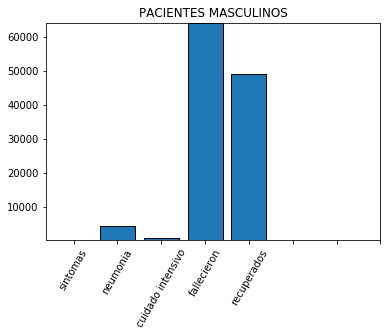

In [101]:
# Gráfico histograma
print("TOTAL PACIENTES MASCULINOS ") 
print("Total masculinos con sintomas: ",sum(pacientes_masculinos_con_sintomas.values())) 
print("Total masculinos con neumonia: ",sum(pacientes_masculinos_con_neumonia.values())) 
print("Total masculinos con cuidado intensivo: ",sum(pacientes_masculinos_cuidado_intensivo.values())) 
print("Total masculinos con fallcidos: ",sum(pacientes_masculinos_fallecidos.values())) 
print("Total masculinos con recuperados: ",sum(pacientes_masculinos_recuperados.values())) 
# %%
# Gráfico de barras

# http://www.datosmacro.com/prima-riesgo/espana

fechas = ['sintomas', 'neumonia', 'cuidado intensivo', 'fallecieron', 'recuperados']
primas = [sum(pacientes_masculinos_con_sintomas.values()),sum(pacientes_masculinos_con_neumonia.values()) , sum(pacientes_masculinos_cuidado_intensivo.values()), sum(pacientes_masculinos_fallecidos.values()), sum(pacientes_masculinos_recuperados.values())]

pp.bar(range(5), primas, edgecolor='black')

pp.xticks(range(8), fechas, rotation=60)
pp.title("PACIENTES MASCULINOS")
pp.ylim(min(primas)-1, max(primas)+1)
pp.show()

# Graficos

TOTAL PACIENTES FEMENINOS 
Total femeninos con sintomas:  97
Total femeninos con neumonia:  5120
Total femeninos con cuidado intensivo:  793
Total femeninos con fallcidos:  75709
Total femeninos con recuperados:  57856


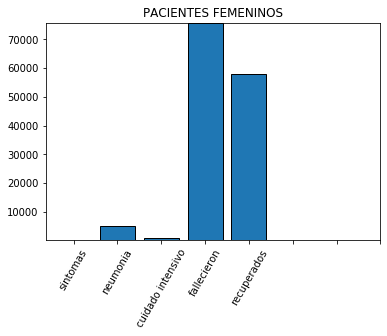

In [118]:
# Gráfico histograma
print("TOTAL PACIENTES FEMENINOS ") 
print("Total femeninos con sintomas: ",sum(pacientes_femeninos_con_sintomas.values())) 
print("Total femeninos con neumonia: ",sum(pacientes_femeninos_con_neumonia.values())) 
print("Total femeninos con cuidado intensivo: ",sum(pacientes_femeninos_cuidado_intensivo.values())) 
print("Total femeninos con fallcidos: ",sum(pacientes_femeninos_fallecidos.values())) 
print("Total femeninos con recuperados: ",sum(pacientes_femeninos_recuperados.values()))
# %%
# Gráfico de barras

fechas = ['sintomas', 'neumonia', 'cuidado intensivo', 'fallecieron', 'recuperados']
primas = [sum(pacientes_femeninos_con_sintomas.values()),sum(pacientes_femeninos_con_neumonia.values()) , sum(pacientes_femeninos_cuidado_intensivo.values()), sum(pacientes_femeninos_fallecidos.values()), sum(pacientes_femeninos_recuperados.values())]

pp.bar(range(5), primas, edgecolor='black')

pp.xticks(range(8), fechas, rotation=60)
pp.title("PACIENTES FEMENINOS")
pp.ylim(min(primas)-1, max(primas)+1)
pp.show()

# TABLA

In [117]:
print("TOTAL PERSONAS")
print("Total niños: ",sum(pacientes_ninos.values()))                
print("Total adultos: ",sum(pacientes_adultos.values()))        
print("Total ancianos: ",sum(pacientes_ancianos.values()))
print("SOLO NIÑOS") 
print("Total niños con sintomas: ",sum(p_ninos_con_sintomas.values())) 
print("Total niños con neumonia: ",sum(p_ninos_con_neumonia.values())) 
print("Total niños con cuidado intensivo: ",sum(p_ninos_cuidado_intensivos.values()))
print("Total niños que falleciron: ",sum(p_ninos_fallecidos.values())) 
print("Total niños que se recuperaron: ",sum(p_ninos_recuperados.values())) 
print("SOLO ADULTOS")
print("Total adultos con sintomas: ",sum(p_adultos_con_sintomas.values())) 
print("Total adultos con neumonia: ",sum(p_adultos_con_neumonia.values())) 
print("Total adultos que falleciron: ",sum(p_adultos_fallecidos.values())) 
print("Total adultos con cuidado intensivo: ",sum(p_adultos_cuidado_intensivos.values()))
print("Total adultos que se recuperaron: ",sum(p_adultos_recuperados.values())) 
print("SOLO ANCIANOS") 
print("Total ancianos con sintomas: ",sum(p_ancianos_con_sintomas.values())) 
print("Total ancianos con neumonia: ",sum(p_ancianos_con_neumonia.values()))
print("Total ancianos con cuidado intensivo: ",sum(p_ancianos_cuidado_intensivos.values()))
print("Total ancianos que falleciron: ",sum(p_ancianos_fallecidos.values())) 
print("Total ancianos que se recuperaron: ",sum(p_ancianos_recuperados.values()))
sum(pacientes_ninos.values())

from tabulate import tabulate
pacientes_resultado=[
['NIÑOS',sum(pacientes_ninos.values()),sum(p_ninos_con_sintomas.values()),sum(p_ninos_con_neumonia.values()),sum(p_ninos_cuidado_intensivos.values()),sum(p_ninos_fallecidos.values()),sum(p_ninos_recuperados.values())],
['ADULTOS',sum(pacientes_adultos.values()),sum(p_adultos_con_sintomas.values()),sum(p_adultos_con_neumonia.values()),sum(p_adultos_cuidado_intensivos.values()),sum(p_adultos_fallecidos.values()),sum(p_adultos_recuperados.values())]
,['ANCIANOS',sum(pacientes_ancianos.values()),sum(p_ancianos_con_sintomas.values()),sum(p_ancianos_con_neumonia.values()),sum(p_ancianos_cuidado_intensivos.values()),sum(p_ancianos_fallecidos.values()),sum(p_ancianos_recuperados.values())]
]
print(tabulate(pacientes_resultado,headers=['EDAD','TOTAL','SINTOMAS','NEUMONIA','INTENSIVOS','FALLECIERON','RECUPERADOS']))
                     


TOTAL PERSONAS
Total niños:  67124
Total adultos:  117771
Total ancianos:  83856
SOLO NIÑOS
Total niños con sintomas:  172
Total niños con neumonia:  134
Total niños con cuidado intensivo:  18
Total niños que falleciron:  2708
Total niños que se recuperaron:  64021
SOLO ADULTOS
Total adultos con sintomas:  103946
Total adultos con neumonia:  4813
Total adultos que falleciron:  72367
Total adultos con cuidado intensivo:  717
Total adultos que se recuperaron:  38395
SOLO ANCIANOS
Total ancianos con sintomas:  47780
Total ancianos con neumonia:  4413
Total ancianos con cuidado intensivo:  669
Total ancianos que falleciron:  64793
Total ancianos que se recuperaron:  4549
EDAD        TOTAL    SINTOMAS    NEUMONIA    INTENSIVOS    FALLECIERON    RECUPERADOS
--------  -------  ----------  ----------  ------------  -------------  -------------
NIÑOS       67124         172         134            18           2708          64021
ADULTOS    117771      103946        4813           717          7